In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from os import walk
import ssa2dCore as ssa2d
import timeit
# import scipy.linalg

%pylab inline
pylab.rcParams['figure.figsize'] = (8, 6)

Populating the interactive namespace from numpy and matplotlib


In [2]:
def svd(path, y, x):
    img = cv2.imread(path,0)
    image = ssa2d.SSA2D(img, y, x)
    image.trajectMatrix()
    image.SVD()
    return image

def getFiles(path):
    files = []
    for (dirpath, dirnames, filenames) in walk(path):
        files = [path + file for file in filenames]
        return files#[0:10]

class cl:
    def __init__(self, className, path, y, x):
        self.name = className
        self.images = []
        self.files = getFiles(path)
        self.image = svd(self.files[0], y, x)

In [73]:
def initCls(path, y, x):
    dirs = []
    for (dirpath, dirnames, filenames) in walk(path):
        dirs = dirnames
        dirs = sorted(dirs)
        break
    cls=[]
    for i in range(len(dirs[0:25])):
        start = time.time()
        cls.append(cl(dirs[i], path+dirs[i]+"/", y, x))
        print(path+dirs[i]+"/", time.time()-start)
    return cls

In [74]:
def allFiles(cls):
    files = []
    for i in range(len(cls)):
        files += cls[i].files
    print(len(files))
    return files

In [3]:
img = cv2.imread("barbara.png",0)
image = ssa2d.SSA2D(img, 10, 10)

In [8]:
image.reconstruct([1])

In [11]:
image.showImage()

AttributeError: 'SSA2D' object has no attribute 'recImg'

In [5]:
image.saveImage()

In [9]:
start = time.time()
image.trajectMatrix()
end = time.time()
print(end - start)

0.5705151557922363


In [10]:
start = time.time()
image.SVD()
end = time.time()
print(end - start)

0.2286062240600586


In [325]:
im = Image.fromarray(img)
im.show()

In [326]:
image = ssa2d.SSA2D(img, 7, 7)
image.trajectMatrix()
image.SVD()

In [75]:
def classification(cls, files, y, x, k):
    started = time.time()
    for i in range(len(files)):
        start = time.time()
        print(i)
        tex = cv2.imread(files[i], 0)
        texture = ssa2d.SSA2D(tex, y, x)
        texture.trajectMatrix()
        texture.SVD()
#         print("svd",time.time()-start)


        minD = 100
        minCl = -1
        for j in range(len(cls)):
            dist = ssa2d.getDistance(cls[j].image,texture,k)
#             print(cls[j].name)
#             print(dist, minD)
            if dist < minD:
                minD = dist
                minCl = j
        print("add to class",time.time()-start)
        print("add to",cls[minCl].name)
        cls[minCl].images.append(files[i])
    return cls
def getSucs(cls, files):
    sucs=0
    for i in range(len(cls)):
        for img in cls[i].images:
            if img.split("/")[2] == cls[i].name:
                sucs +=1
    print(sucs/len(files),"%")
    d={}
    for i in range(len(cls)):
        sucs=0
        for img in cls[i].images:
            if img.split("/")[2] == cls[i].name:
                sucs +=1
        if len(cls[i].images) > 0:
            d.update( {cls[i].name : sucs/len(cls[i].images)} )
    print(d)

In [97]:
path = "./ktd80/"

In [78]:
y, x = 5, 5 
k = 3
cls = initCls(path, y, x)
files = allFiles(cls)
cls = classification(cls, files, y, x, k)
getSucs(cls, files)

./ktd80/blanket1/ 0.7640678882598877
./ktd80/blanket2/ 0.7489931583404541
./ktd80/ceiling1/ 0.7339792251586914
./ktd80/ceiling2/ 0.733952522277832
./ktd80/cushion1/ 0.7600224018096924
./ktd80/floor1/ 0.7459855079650879
./ktd80/grass1/ 0.7489922046661377
./ktd80/lentils1/ 0.7459850311279297
./ktd80/pearlsugar1/ 0.7419743537902832
./ktd80/rice2/ 0.7540068626403809
./ktd80/sand1/ 0.8001015186309814
./ktd80/scarf1/ 0.7650637626647949
./ktd80/scarf2/ 0.7429766654968262
./ktd80/screen1/ 0.738966703414917
./ktd80/seat1/ 0.7038445472717285
./ktd80/seat2/ 0.7138988971710205
./ktd80/stone1/ 0.730151891708374
./ktd80/stone2/ 0.7252302169799805
./ktd80/stone3/ 0.7449820041656494
./ktd80/stoneslab1/ 0.791107177734375
1600
0
add to class 0.7399692535400391
add to blanket1
1
add to class 0.7489917278289795
add to blanket1
2
add to class 0.766038179397583
add to blanket1
3
add to class 0.739997148513794
add to blanket1
4
add to class 0.7419464588165283
add to blanket1
5
add to class 0.7489924430847168

add to class 0.7320256233215332
add to blanket2
148
add to class 0.7299766540527344
add to blanket2
149
add to class 0.7230021953582764
add to blanket2
150
add to class 0.7300512790679932
add to stone2
151
add to class 0.7138888835906982
add to scarf1
152
add to class 0.7347939014434814
add to blanket2
153
add to class 0.7256965637207031
add to blanket2
154
add to class 0.7280137538909912
add to blanket2
155
add to class 0.7480533123016357
add to blanket2
156
add to class 0.7349905967712402
add to blanket2
157
add to class 0.729975700378418
add to blanket2
158
add to class 0.759082555770874
add to scarf1
159
add to class 0.73091721534729
add to stone2
160
add to class 0.7189409732818604
add to ceiling1
161
add to class 0.72389817237854
add to ceiling1
162
add to class 0.7128970623016357
add to ceiling1
163
add to class 0.7179391384124756
add to ceiling1
164
add to class 0.7168788909912109
add to ceiling1
165
add to class 0.7179102897644043
add to ceiling1
166
add to class 0.72091794013

add to class 0.7169065475463867
add to ceiling2
307
add to class 0.7179102897644043
add to ceiling2
308
add to class 0.7179100513458252
add to ceiling2
309
add to class 0.7169079780578613
add to ceiling2
310
add to class 0.726008415222168
add to ceiling2
311
add to class 0.7139770984649658
add to ceiling2
312
add to class 0.7199161052703857
add to ceiling2
313
add to class 0.7118930816650391
add to ceiling2
314
add to class 0.7310221195220947
add to ceiling2
315
add to class 0.7274067401885986
add to ceiling2
316
add to class 0.7430343627929688
add to ceiling2
317
add to class 0.7340314388275146
add to ceiling2
318
add to class 0.7240045070648193
add to ceiling2
319
add to class 0.7219970226287842
add to ceiling2
320
add to class 0.7429769039154053
add to cushion1
321
add to class 0.714902400970459
add to cushion1
322
add to class 0.7189128398895264
add to cushion1
323
add to class 0.7419743537902832
add to cushion1
324
add to class 0.7229235172271729
add to cushion1
325
add to class 0

add to class 0.7219207286834717
add to floor1
469
add to class 0.7108912467956543
add to floor1
470
add to class 0.7169342041015625
add to floor1
471
add to class 0.7269339561462402
add to cushion1
472
add to class 0.7319200038909912
add to floor1
473
add to class 0.7273304462432861
add to floor1
474
add to class 0.7347710132598877
add to floor1
475
add to class 0.7223997116088867
add to floor1
476
add to class 0.7270121574401855
add to floor1
477
add to class 0.7229595184326172
add to floor1
478
add to class 0.7310266494750977
add to floor1
479
add to class 0.7307112216949463
add to cushion1
480
add to class 0.7118942737579346
add to grass1
481
add to class 0.7128973007202148
add to grass1
482
add to class 0.716907262802124
add to stone2
483
add to class 0.7219212055206299
add to stone1
484
add to class 0.7179105281829834
add to sand1
485
add to class 0.716907262802124
add to blanket2
486
add to class 0.7149021625518799
add to blanket2
487
add to class 0.7169077396392822
add to blanke

add to class 0.7256815433502197
add to scarf1
631
add to class 0.7189116477966309
add to pearlsugar1
632
add to class 0.7220282554626465
add to sand1
633
add to class 0.7158772945404053
add to sand1
634
add to class 0.7318155765533447
add to sand1
635
add to class 0.7209188938140869
add to stone1
636
add to class 0.7360353469848633
add to stone1
637
add to class 0.7109527587890625
add to lentils1
638
add to class 0.7209455966949463
add to scarf1
639
add to class 0.7179098129272461
add to pearlsugar1
640
add to class 0.715904951095581
add to pearlsugar1
641
add to class 0.7199161052703857
add to pearlsugar1
642
add to class 0.7118661403656006
add to pearlsugar1
643
add to class 0.7138996124267578
add to scarf1
644
add to class 0.714902400970459
add to stone1
645
add to class 0.7138993740081787
add to blanket2
646
add to class 0.7199158668518066
add to blanket2
647
add to class 0.715904712677002
add to blanket2
648
add to class 0.7269341945648193
add to pearlsugar1
649
add to class 0.713

add to class 0.7169673442840576
add to scarf1
791
add to class 0.7128965854644775
add to pearlsugar1
792
add to class 0.7189140319824219
add to blanket2
793
add to class 0.7541835308074951
add to blanket2
794
add to class 0.7240047454833984
add to blanket2
795
add to class 0.7179105281829834
add to blanket2
796
add to class 0.7189478874206543
add to stone1
797
add to class 0.7240316867828369
add to scarf1
798
add to class 0.7198872566223145
add to lentils1
799
add to class 0.7209503650665283
add to pearlsugar1
800
add to class 0.7159051895141602
add to sand1
801
add to class 0.7149019241333008
add to sand1
802
add to class 0.723926305770874
add to sand1
803
add to class 0.7199156284332275
add to sand1
804
add to class 0.7189130783081055
add to sand1
805
add to class 0.7199153900146484
add to sand1
806
add to class 0.715904712677002
add to ceiling2
807
add to class 0.7179102897644043
add to ceiling2
808
add to class 0.7209186553955078
add to sand1
809
add to class 0.7179098129272461
add

add to class 0.7229585647583008
add to blanket2
955
add to class 0.7209789752960205
add to blanket2
956
add to class 0.7640056610107422
add to stone1
957
add to class 0.719994306564331
add to stone1
958
add to class 0.7439799308776855
add to scarf1
959
add to class 0.716907262802124
add to scarf1
960
add to class 0.7139267921447754
add to scarf2
961
add to class 0.7118663787841797
add to scarf2
962
add to class 0.7149026393890381
add to scarf2
963
add to class 0.716935396194458
add to scarf2
964
add to class 0.7480058670043945
add to scarf2
965
add to class 0.7128710746765137
add to scarf2
966
add to class 0.7159044742584229
add to blanket2
967
add to class 0.7139277458190918
add to blanket2
968
add to class 0.7219202518463135
add to scarf2
969
add to class 0.748992919921875
add to scarf2
970
add to class 0.7419724464416504
add to scarf2
971
add to class 0.7159051895141602
add to scarf2
972
add to class 0.7149021625518799
add to scarf2
973
add to class 0.7149016857147217
add to scarf2


add to class 0.7179372310638428
add to ceiling1
1116
add to class 0.7229235172271729
add to ceiling1
1117
add to class 0.7254757881164551
add to sand1
1118
add to class 0.7239856719970703
add to sand1
1119
add to class 0.7198870182037354
add to sand1
1120
add to class 0.7179052829742432
add to seat1
1121
add to class 0.7149300575256348
add to seat1
1122
add to class 0.7169063091278076
add to seat1
1123
add to class 0.7189130783081055
add to blanket1
1124
add to class 0.7189130783081055
add to blanket1
1125
add to class 0.7149021625518799
add to blanket1
1126
add to class 0.7169075012207031
add to ceiling1
1127
add to class 0.7199440002441406
add to ceiling1
1128
add to class 0.715876579284668
add to seat1
1129
add to class 0.7199153900146484
add to seat1
1130
add to class 0.7179105281829834
add to seat1
1131
add to class 0.7219212055206299
add to blanket1
1132
add to class 0.7229232788085938
add to blanket1
1133
add to class 0.7189126014709473
add to blanket1
1134
add to class 0.726934

add to class 0.9098715782165527
add to ceiling1
1275
add to class 0.8432426452636719
add to blanket1
1276
add to class 0.8529818058013916
add to blanket1
1277
add to class 1.074594497680664
add to seat2
1278
add to class 0.9019148349761963
add to seat2
1279
add to class 0.7521071434020996
add to seat2
1280
add to class 0.71687912940979
add to stone1
1281
add to class 0.7249288558959961
add to stone1
1282
add to class 0.7219212055206299
add to stone1
1283
add to class 0.7179102897644043
add to stone1
1284
add to class 0.7159323692321777
add to stone1
1285
add to class 0.7469580173492432
add to stone1
1286
add to class 0.714902400970459
add to stone1
1287
add to class 0.7199156284332275
add to sand1
1288
add to class 0.7269341945648193
add to stone1
1289
add to class 0.7189130783081055
add to stone1
1290
add to class 0.715904951095581
add to stone2
1291
add to class 0.7138988971710205
add to stone2
1292
add to class 0.7149026393890381
add to stone2
1293
add to class 0.7199153900146484
ad

add to class 0.737962007522583
add to blanket2
1435
add to class 0.7198848724365234
add to blanket2
1436
add to class 0.715904951095581
add to stone2
1437
add to class 0.722954273223877
add to stone2
1438
add to class 0.7219216823577881
add to stone1
1439
add to class 0.7219204902648926
add to grass1
1440
add to class 0.7209181785583496
add to stone3
1441
add to class 0.7128970623016357
add to stone3
1442
add to class 0.7169077396392822
add to stone3
1443
add to class 0.719914436340332
add to seat2
1444
add to class 0.7219207286834717
add to blanket2
1445
add to class 0.7199153900146484
add to blanket2
1446
add to class 0.7189128398895264
add to blanket2
1447
add to class 0.7159044742584229
add to blanket2
1448
add to class 0.7138996124267578
add to stone3
1449
add to class 0.7199156284332275
add to stone3
1450
add to class 0.7138993740081787
add to stone3
1451
add to class 0.7189121246337891
add to stoneslab1
1452
add to class 0.7179093360900879
add to stoneslab1
1453
add to class 0.7

add to class 0.7238976955413818
add to stoneslab1
1589
add to class 0.7317039966583252
add to stoneslab1
1590
add to class 0.7520010471343994
add to stoneslab1
1591
add to class 0.7209179401397705
add to stoneslab1
1592
add to class 0.7199797630310059
add to stoneslab1
1593
add to class 0.7419736385345459
add to stoneslab1
1594
add to class 0.7178826332092285
add to stoneslab1
1595
add to class 0.7199501991271973
add to stoneslab1
1596
add to class 0.7370383739471436
add to stoneslab1
1597
add to class 0.7189123630523682
add to stoneslab1
1598
add to class 0.722923755645752
add to stoneslab1
1599
add to class 0.7209525108337402
add to stoneslab1
0.51875 %
{'blanket1': 0.4861111111111111, 'blanket2': 0.21, 'ceiling1': 0.5739130434782609, 'ceiling2': 0.963855421686747, 'cushion1': 0.8367346938775511, 'floor1': 0.62, 'grass1': 0.6842105263157895, 'lentils1': 0.5, 'pearlsugar1': 0.4444444444444444, 'rice2': 0.35714285714285715, 'sand1': 0.5138888888888888, 'scarf1': 0.3717948717948718, 'sc

In [79]:
y, x = 5, 5 
k = 5
cls = initCls(path, y, x)
files = allFiles(cls)
cls = classification(cls, files, y, x, k)
getSucs(cls, files)

./ktd80/blanket1/ 0.7179081439971924
./ktd80/blanket2/ 0.7380406856536865
./ktd80/ceiling1/ 0.7128968238830566
./ktd80/ceiling2/ 0.7138996124267578
./ktd80/cushion1/ 0.7098898887634277
./ktd80/floor1/ 0.710890531539917
./ktd80/grass1/ 0.7018678188323975
./ktd80/lentils1/ 0.7160153388977051
./ktd80/pearlsugar1/ 0.7058782577514648
./ktd80/rice2/ 0.7048757076263428
./ktd80/sand1/ 0.718092679977417
./ktd80/scarf1/ 0.7219979763031006
./ktd80/scarf2/ 0.7058777809143066
./ktd80/screen1/ 0.7008647918701172
./ktd80/seat1/ 0.7018675804138184
./ktd80/seat2/ 0.7098889350891113
./ktd80/stone1/ 0.7058782577514648
./ktd80/stone2/ 0.7028698921203613
./ktd80/stone3/ 0.7008650302886963
./ktd80/stoneslab1/ 0.6998627185821533
1600
0
add to class 0.707883358001709
add to blanket1
1
add to class 0.7128968238830566
add to scarf1
2
add to class 0.7189130783081055
add to stone1
3
add to class 0.7149026393890381
add to floor1
4
add to class 0.7469873428344727
add to floor1
5
add to class 0.8141665458679199
add 

add to class 0.7189130783081055
add to stone2
150
add to class 0.7149021625518799
add to stone2
151
add to class 0.7149019241333008
add to stone2
152
add to class 0.7199153900146484
add to sand1
153
add to class 0.7138996124267578
add to sand1
154
add to class 0.7149019241333008
add to sand1
155
add to class 0.7149028778076172
add to ceiling2
156
add to class 0.7199146747589111
add to blanket2
157
add to class 0.7189126014709473
add to sand1
158
add to class 0.7189130783081055
add to stone2
159
add to class 0.7149021625518799
add to stone2
160
add to class 0.7118940353393555
add to ceiling1
161
add to class 0.715904951095581
add to ceiling1
162
add to class 0.7118937969207764
add to ceiling1
163
add to class 0.7159044742584229
add to ceiling1
164
add to class 0.7169070243835449
add to ceiling1
165
add to class 0.7189133167266846
add to ceiling1
166
add to class 0.7159044742584229
add to ceiling1
167
add to class 0.714902400970459
add to ceiling1
168
add to class 0.7179100513458252
add 

add to class 0.7169075012207031
add to ceiling2
310
add to class 0.7169079780578613
add to blanket2
311
add to class 0.7169077396392822
add to blanket2
312
add to class 0.7149019241333008
add to floor1
313
add to class 0.714902400970459
add to floor1
314
add to class 0.7179102897644043
add to floor1
315
add to class 0.7128968238830566
add to ceiling2
316
add to class 0.7138991355895996
add to ceiling2
317
add to class 0.7149026393890381
add to ceiling2
318
add to class 0.7189128398895264
add to blanket2
319
add to class 0.7128961086273193
add to blanket2
320
add to class 0.7169075012207031
add to cushion1
321
add to class 0.7138998508453369
add to cushion1
322
add to class 0.7128968238830566
add to cushion1
323
add to class 0.7149019241333008
add to floor1
324
add to class 0.7128973007202148
add to floor1
325
add to class 0.7199156284332275
add to floor1
326
add to class 0.7138993740081787
add to floor1
327
add to class 0.7149021625518799
add to ceiling2
328
add to class 0.713899850845

add to class 0.7128970623016357
add to ceiling2
472
add to class 0.7189130783081055
add to ceiling2
473
add to class 0.7199156284332275
add to sand1
474
add to class 0.7189128398895264
add to ceiling2
475
add to class 0.7199156284332275
add to ceiling2
476
add to class 0.7179102897644043
add to ceiling2
477
add to class 0.7161881923675537
add to ceiling2
478
add to class 0.715904951095581
add to blanket2
479
add to class 0.7179102897644043
add to blanket2
480
add to class 0.7149019241333008
add to grass1
481
add to class 0.7128970623016357
add to grass1
482
add to class 0.7149021625518799
add to stone2
483
add to class 0.714902400970459
add to stone1
484
add to class 0.7138991355895996
add to sand1
485
add to class 0.7299425601959229
add to sand1
486
add to class 0.715904712677002
add to blanket2
487
add to class 0.716907262802124
add to blanket2
488
add to class 0.7138998508453369
add to grass1
489
add to class 0.7138996124267578
add to grass1
490
add to class 0.7149021625518799
add t

add to class 0.7189133167266846
add to sand1
634
add to class 0.7149021625518799
add to sand1
635
add to class 0.715904712677002
add to stone1
636
add to class 0.7138991355895996
add to stone1
637
add to class 0.714902400970459
add to scarf1
638
add to class 0.7128968238830566
add to cushion1
639
add to class 0.7138993740081787
add to blanket2
640
add to class 0.7108914852142334
add to pearlsugar1
641
add to class 0.7189130783081055
add to lentils1
642
add to class 0.714902400970459
add to scarf1
643
add to class 0.715904951095581
add to stone1
644
add to class 0.7128963470458984
add to stone1
645
add to class 0.7149336338043213
add to sand1
646
add to class 0.7158732414245605
add to blanket2
647
add to class 0.7169075012207031
add to blanket2
648
add to class 0.7138998508453369
add to grass1
649
add to class 0.7138993740081787
add to pearlsugar1
650
add to class 0.7128968238830566
add to blanket2
651
add to class 0.7169077396392822
add to scarf1
652
add to class 0.7128968238830566
add

add to class 0.7199158668518066
add to floor1
796
add to class 0.7199153900146484
add to stone1
797
add to class 0.7149021625518799
add to scarf1
798
add to class 0.7179102897644043
add to stone2
799
add to class 0.7199153900146484
add to pearlsugar1
800
add to class 0.7159051895141602
add to sand1
801
add to class 0.7219204902648926
add to sand1
802
add to class 0.7199158668518066
add to sand1
803
add to class 0.7159044742584229
add to sand1
804
add to class 0.7189130783081055
add to sand1
805
add to class 0.7149019241333008
add to floor1
806
add to class 0.7179105281829834
add to floor1
807
add to class 0.7169075012207031
add to floor1
808
add to class 0.7189123630523682
add to sand1
809
add to class 0.7128968238830566
add to sand1
810
add to class 0.7199156284332275
add to sand1
811
add to class 0.7149019241333008
add to sand1
812
add to class 0.7189133167266846
add to sand1
813
add to class 0.7199151515960693
add to sand1
814
add to class 0.7189128398895264
add to floor1
815
add to

add to class 0.7159044742584229
add to scarf2
962
add to class 0.7179102897644043
add to scarf2
963
add to class 0.7199156284332275
add to scarf2
964
add to class 0.7179102897644043
add to scarf2
965
add to class 0.7159044742584229
add to blanket2
966
add to class 0.7209186553955078
add to blanket2
967
add to class 0.7179098129272461
add to blanket2
968
add to class 0.7199158668518066
add to scarf2
969
add to class 0.7169075012207031
add to scarf2
970
add to class 0.7179100513458252
add to scarf2
971
add to class 0.715904951095581
add to scarf2
972
add to class 0.7179105281829834
add to scarf2
973
add to class 0.7199153900146484
add to scarf2
974
add to class 0.7199153900146484
add to scarf2
975
add to class 0.715904712677002
add to blanket2
976
add to class 0.7169079780578613
add to scarf2
977
add to class 0.7229235172271729
add to scarf2
978
add to class 0.7179102897644043
add to scarf2
979
add to class 0.722923755645752
add to scarf2
980
add to class 0.7209169864654541
add to scarf2

add to class 0.722923755645752
add to seat1
1122
add to class 0.716907262802124
add to seat1
1123
add to class 0.7169075012207031
add to blanket1
1124
add to class 0.714902400970459
add to blanket1
1125
add to class 0.715904951095581
add to blanket2
1126
add to class 0.7249290943145752
add to blanket2
1127
add to class 0.7169075012207031
add to blanket2
1128
add to class 0.7189128398895264
add to seat1
1129
add to class 0.7159051895141602
add to seat1
1130
add to class 0.7239255905151367
add to seat1
1131
add to class 0.7179102897644043
add to blanket1
1132
add to class 0.7138996124267578
add to blanket1
1133
add to class 0.7179100513458252
add to blanket2
1134
add to class 0.7199153900146484
add to blanket2
1135
add to class 0.7179102897644043
add to blanket2
1136
add to class 0.7199156284332275
add to blanket1
1137
add to class 0.716907262802124
add to blanket1
1138
add to class 0.7189133167266846
add to blanket1
1139
add to class 0.7199153900146484
add to blanket1
1140
add to class 

add to class 0.7169115543365479
add to seat2
1280
add to class 0.7138991355895996
add to stone1
1281
add to class 0.7168788909912109
add to stone1
1282
add to class 0.715904951095581
add to stone1
1283
add to class 0.7169373035430908
add to stone1
1284
add to class 0.7159321308135986
add to stone2
1285
add to class 0.7188854217529297
add to stone2
1286
add to class 0.7189128398895264
add to blanket2
1287
add to class 0.7219488620758057
add to blanket2
1288
add to class 0.7228958606719971
add to stone1
1289
add to class 0.723926305770874
add to stone1
1290
add to class 0.7219192981719971
add to stone1
1291
add to class 0.7219212055206299
add to stone1
1292
add to class 0.7179107666015625
add to stone2
1293
add to class 0.719940185546875
add to stone2
1294
add to class 0.7168822288513184
add to blanket2
1295
add to class 0.7189130783081055
add to blanket2
1296
add to class 0.716935396194458
add to stone1
1297
add to class 0.7209177017211914
add to stone1
1298
add to class 0.7189126014709

add to class 0.7199153900146484
add to blanket2
1439
add to class 0.7199156284332275
add to blanket2
1440
add to class 0.7138984203338623
add to stone3
1441
add to class 0.7179102897644043
add to stone3
1442
add to class 0.7149026393890381
add to scarf1
1443
add to class 0.7189130783081055
add to stoneslab1
1444
add to class 0.7179102897644043
add to floor1
1445
add to class 0.7209179401397705
add to blanket2
1446
add to class 0.7159051895141602
add to blanket2
1447
add to class 0.7179100513458252
add to blanket2
1448
add to class 0.7138993740081787
add to scarf2
1449
add to class 0.7119226455688477
add to scarf2
1450
add to class 0.7149014472961426
add to stone2
1451
add to class 0.71687912940979
add to stoneslab1
1452
add to class 0.7169079780578613
add to stoneslab1
1453
add to class 0.7169075012207031
add to blanket2
1454
add to class 0.722923755645752
add to blanket2
1455
add to class 0.7179102897644043
add to blanket2
1456
add to class 0.7139272689819336
add to scarf2
1457
add to

add to class 0.7279367446899414
add to stoneslab1
1594
add to class 0.7189381122589111
add to blanket2
1595
add to class 0.7229256629943848
add to blanket2
1596
add to class 0.7199161052703857
add to stoneslab1
1597
add to class 0.7198879718780518
add to stoneslab1
1598
add to class 0.7189128398895264
add to stoneslab1
1599
add to class 0.7229235172271729
add to stoneslab1
0.290625 %
{'blanket1': 0.18181818181818182, 'blanket2': 0.05422993492407809, 'ceiling1': 0.958904109589041, 'ceiling2': 0.2702702702702703, 'cushion1': 0.5, 'floor1': 0.09649122807017543, 'grass1': 0.3333333333333333, 'lentils1': 0.25, 'pearlsugar1': 0.4666666666666667, 'rice2': 0.42857142857142855, 'sand1': 0.375, 'scarf1': 0.3898305084745763, 'scarf2': 0.8461538461538461, 'screen1': 1.0, 'seat1': 1.0, 'seat2': 1.0, 'stone1': 0.3384615384615385, 'stone2': 0.19166666666666668, 'stone3': 1.0, 'stoneslab1': 0.7321428571428571}


In [80]:
y, x = 10, 10 
k = 3
cls = initCls(path, y, x)
files = allFiles(cls)
cls = classification(cls, files, y, x, k)
getSucs(cls, files)

./ktd80/blanket1/ 0.9776804447174072
./ktd80/blanket2/ 0.9615578651428223
./ktd80/ceiling1/ 0.9485242366790771
./ktd80/ceiling2/ 0.9846193790435791
./ktd80/cushion1/ 0.9535374641418457
./ktd80/floor1/ 0.942507266998291
./ktd80/grass1/ 0.9435100555419922
./ktd80/lentils1/ 0.9485232830047607
./ktd80/pearlsugar1/ 0.9545395374298096
./ktd80/rice2/ 0.9445123672485352
./ktd80/sand1/ 0.9475216865539551
./ktd80/scarf1/ 0.9475216865539551
./ktd80/scarf2/ 1.0437769889831543
./ktd80/screen1/ 0.9687173366546631
./ktd80/seat1/ 0.9531552791595459
./ktd80/seat2/ 0.9425063133239746
./ktd80/stone1/ 0.9788391590118408
./ktd80/stone2/ 0.9745817184448242
./ktd80/stone3/ 0.9886975288391113
./ktd80/stoneslab1/ 0.9685847759246826
1600
0
add to class 1.0197136402130127
add to blanket1
1
add to class 1.024726152420044
add to blanket1
2
add to class 1.0297396183013916
add to blanket1
3
add to class 1.0287368297576904
add to blanket1
4
add to class 1.1701126098632812
add to blanket1
5
add to class 1.033748626708

add to class 1.0517988204956055
add to stone2
149
add to class 1.0538034439086914
add to stone2
150
add to class 1.0397672653198242
add to stone2
151
add to class 1.0417723655700684
add to stone2
152
add to class 1.0487899780273438
add to blanket2
153
add to class 1.0427732467651367
add to blanket2
154
add to class 1.0477879047393799
add to blanket2
155
add to class 1.041771411895752
add to blanket2
156
add to class 1.0467846393585205
add to stone2
157
add to class 1.0618255138397217
add to blanket2
158
add to class 1.044778823852539
add to stone2
159
add to class 1.0407686233520508
add to stone2
160
add to class 1.0467848777770996
add to ceiling1
161
add to class 1.0457818508148193
add to ceiling1
162
add to class 1.0477862358093262
add to ceiling1
163
add to class 1.0427749156951904
add to ceiling1
164
add to class 1.060821533203125
add to ceiling1
165
add to class 1.0387632846832275
add to ceiling1
166
add to class 1.051800012588501
add to ceiling1
167
add to class 1.043776035308838

add to class 1.0447793006896973
add to ceiling2
308
add to class 1.0417726039886475
add to ceiling2
309
add to class 1.041771650314331
add to ceiling2
310
add to class 1.0407695770263672
add to ceiling2
311
add to class 1.0447802543640137
add to ceiling2
312
add to class 1.0417709350585938
add to ceiling2
313
add to class 1.0427734851837158
add to ceiling2
314
add to class 1.0457828044891357
add to ceiling2
315
add to class 1.050795555114746
add to ceiling2
316
add to class 1.0487902164459229
add to ceiling2
317
add to class 1.0477874279022217
add to ceiling2
318
add to class 1.0487895011901855
add to ceiling2
319
add to class 1.0608234405517578
add to ceiling2
320
add to class 1.0437767505645752
add to cushion1
321
add to class 1.0417726039886475
add to cushion1
322
add to class 1.0467844009399414
add to cushion1
323
add to class 1.0548067092895508
add to cushion1
324
add to class 1.0487895011901855
add to cushion1
325
add to class 1.0528013706207275
add to cushion1
326
add to class 1

add to class 1.047788143157959
add to floor1
471
add to class 1.0457825660705566
add to floor1
472
add to class 1.0417718887329102
add to floor1
473
add to class 1.0407688617706299
add to floor1
474
add to class 1.0447802543640137
add to floor1
475
add to class 1.0437767505645752
add to floor1
476
add to class 1.0437767505645752
add to floor1
477
add to class 1.0417702198028564
add to floor1
478
add to class 1.0517985820770264
add to floor1
479
add to class 1.0507965087890625
add to floor1
480
add to class 1.0507965087890625
add to grass1
481
add to class 1.046785593032837
add to grass1
482
add to class 1.040769100189209
add to stone2
483
add to class 1.047788143157959
add to sand1
484
add to class 1.0528008937835693
add to sand1
485
add to class 1.0457818508148193
add to blanket2
486
add to class 1.0437767505645752
add to blanket2
487
add to class 1.0487902164459229
add to blanket2
488
add to class 1.0477874279022217
add to grass1
489
add to class 1.0407674312591553
add to stone2
490


add to class 1.0507957935333252
add to scarf1
634
add to class 1.048790693283081
add to stone1
635
add to class 1.0497932434082031
add to scarf1
636
add to class 1.0447795391082764
add to lentils1
637
add to class 1.0467848777770996
add to lentils1
638
add to class 1.0628280639648438
add to pearlsugar1
639
add to class 1.0417723655700684
add to pearlsugar1
640
add to class 1.0467841625213623
add to pearlsugar1
641
add to class 1.04477858543396
add to pearlsugar1
642
add to class 1.0477876663208008
add to pearlsugar1
643
add to class 1.043776035308838
add to pearlsugar1
644
add to class 1.05179762840271
add to pearlsugar1
645
add to class 1.0457823276519775
add to floor1
646
add to class 1.0548069477081299
add to floor1
647
add to class 1.0457820892333984
add to floor1
648
add to class 1.0447778701782227
add to pearlsugar1
649
add to class 1.0387656688690186
add to pearlsugar1
650
add to class 1.0507941246032715
add to pearlsugar1
651
add to class 1.0407688617706299
add to pearlsugar1
6

add to class 1.0507957935333252
add to floor1
793
add to class 1.0598182678222656
add to floor1
794
add to class 1.0487895011901855
add to floor1
795
add to class 1.046785593032837
add to floor1
796
add to class 1.041771411895752
add to floor1
797
add to class 1.0477869510650635
add to rice2
798
add to class 1.038764238357544
add to rice2
799
add to class 1.0487902164459229
add to rice2
800
add to class 1.0417726039886475
add to sand1
801
add to class 1.0417709350585938
add to sand1
802
add to class 1.0397660732269287
add to sand1
803
add to class 1.0427732467651367
add to sand1
804
add to class 1.0407688617706299
add to sand1
805
add to class 1.0447793006896973
add to sand1
806
add to class 1.0618245601654053
add to scarf1
807
add to class 1.0377624034881592
add to scarf1
808
add to class 1.0427742004394531
add to sand1
809
add to class 1.040769338607788
add to sand1
810
add to class 1.0467851161956787
add to sand1
811
add to class 1.0447790622711182
add to sand1
812
add to class 1.03

add to class 1.0457823276519775
add to scarf1
959
add to class 1.0598185062408447
add to scarf1
960
add to class 1.0337488651275635
add to scarf2
961
add to class 1.0427742004394531
add to scarf2
962
add to class 1.0367579460144043
add to scarf2
963
add to class 1.0407688617706299
add to scarf2
964
add to class 1.0447797775268555
add to scarf2
965
add to class 1.0457823276519775
add to scarf2
966
add to class 1.0969178676605225
add to scarf2
967
add to class 1.0387632846832275
add to scarf2
968
add to class 1.0397658348083496
add to scarf2
969
add to class 1.0427742004394531
add to scarf2
970
add to class 1.041771411895752
add to scarf2
971
add to class 1.0407683849334717
add to scarf2
972
add to class 1.0457830429077148
add to scarf2
973
add to class 1.043776273727417
add to scarf2
974
add to class 1.060821771621704
add to scarf2
975
add to class 1.0397660732269287
add to scarf2
976
add to class 1.0427749156951904
add to scarf2
977
add to class 1.0447795391082764
add to scarf2
978
add

add to class 1.0528011322021484
add to blanket2
1119
add to class 1.0588164329528809
add to blanket2
1120
add to class 1.0377612113952637
add to seat1
1121
add to class 1.046785831451416
add to scarf1
1122
add to class 1.0487899780273438
add to scarf1
1123
add to class 1.050795316696167
add to scarf1
1124
add to class 1.057814598083496
add to scarf1
1125
add to class 1.0487902164459229
add to scarf1
1126
add to class 1.046783208847046
add to seat1
1127
add to class 1.0658349990844727
add to seat1
1128
add to class 1.0427744388580322
add to seat1
1129
add to class 1.0447797775268555
add to seat1
1130
add to class 1.043776035308838
add to scarf1
1131
add to class 1.0477886199951172
add to scarf1
1132
add to class 1.0548062324523926
add to scarf1
1133
add to class 1.0427744388580322
add to seat1
1134
add to class 1.064833164215088
add to seat1
1135
add to class 1.0367579460144043
add to seat1
1136
add to class 1.0477874279022217
add to seat1
1137
add to class 1.0437779426574707
add to sea

add to class 1.043776035308838
add to stone1
1284
add to class 1.045781135559082
add to stone1
1285
add to class 1.039766788482666
add to stone1
1286
add to class 1.0407698154449463
add to stone1
1287
add to class 1.044778823852539
add to stone2
1288
add to class 1.0387635231018066
add to stone1
1289
add to class 1.0367586612701416
add to stone1
1290
add to class 1.041771411895752
add to stone1
1291
add to class 1.040769100189209
add to stone1
1292
add to class 1.0427744388580322
add to stone1
1293
add to class 1.0427734851837158
add to stone1
1294
add to class 1.1039378643035889
add to stone1
1295
add to class 1.0387632846832275
add to stone1
1296
add to class 1.041771411895752
add to stone1
1297
add to class 1.0517990589141846
add to stone1
1298
add to class 1.042773962020874
add to stone1
1299
add to class 1.0447797775268555
add to stone1
1300
add to class 1.040769338607788
add to stone1
1301
add to class 1.041771411895752
add to stone1
1302
add to class 1.0457823276519775
add to st

add to class 1.051797866821289
add to blanket2
1447
add to class 1.0588161945343018
add to blanket2
1448
add to class 1.0377607345581055
add to stone3
1449
add to class 1.0407679080963135
add to stone3
1450
add to class 1.0447793006896973
add to stone3
1451
add to class 1.0417718887329102
add to stone3
1452
add to class 1.0477869510650635
add to stoneslab1
1453
add to class 1.0447804927825928
add to sand1
1454
add to class 1.0457830429077148
add to sand1
1455
add to class 1.0648324489593506
add to blanket2
1456
add to class 1.0367588996887207
add to stone2
1457
add to class 1.0387628078460693
add to stone3
1458
add to class 1.045781135559082
add to stone3
1459
add to class 1.0417718887329102
add to stone3
1460
add to class 1.0387632846832275
add to stone3
1461
add to class 1.0397658348083496
add to sand1
1462
add to class 1.0457818508148193
add to sand1
1463
add to class 1.056811809539795
add to sand1
1464
add to class 1.0457818508148193
add to sand1
1465
add to class 1.043775796890258

In [81]:
y, x = 10, 10 
k = 5
cls = initCls(path, y, x)
files = allFiles(cls)
cls = classification(cls, files, y, x, k)
getSucs(cls, files)

./ktd80/blanket1/ 0.9936423301696777
./ktd80/blanket2/ 1.0089950561523438
./ktd80/ceiling1/ 0.9767107963562012
./ktd80/ceiling2/ 0.9656367301940918
./ktd80/cushion1/ 0.9708843231201172
./ktd80/floor1/ 0.9515030384063721
./ktd80/grass1/ 0.9435102939605713
./ktd80/lentils1/ 0.959632158279419
./ktd80/pearlsugar1/ 0.9485230445861816
./ktd80/rice2/ 0.9515318870544434
./ktd80/sand1/ 0.9606935977935791
./ktd80/scarf1/ 0.9445133209228516
./ktd80/scarf2/ 1.106945514678955
./ktd80/screen1/ 0.9525341987609863
./ktd80/seat1/ 0.9545397758483887
./ktd80/seat2/ 0.961601972579956
./ktd80/stone1/ 0.9585225582122803
./ktd80/stone2/ 0.9655697345733643
./ktd80/stone3/ 0.9957938194274902
./ktd80/stoneslab1/ 0.953535795211792
1600
0
add to class 1.033750057220459
add to blanket1
1
add to class 1.0387632846832275
add to blanket1
2
add to class 1.198188304901123
add to blanket1
3
add to class 1.1490578651428223
add to blanket1
4
add to class 1.0407686233520508
add to blanket1
5
add to class 1.0377616882324219

add to class 1.042773723602295
add to stone2
150
add to class 1.0357556343078613
add to stone2
151
add to class 1.0377607345581055
add to stone1
152
add to class 1.0357558727264404
add to scarf1
153
add to class 1.0377607345581055
add to sand1
154
add to class 1.0377614498138428
add to sand1
155
add to class 1.0357558727264404
add to blanket2
156
add to class 1.0367588996887207
add to blanket2
157
add to class 1.0367591381072998
add to stone2
158
add to class 1.0347533226013184
add to stone2
159
add to class 1.0387632846832275
add to stone1
160
add to class 1.0387630462646484
add to ceiling1
161
add to class 1.0407679080963135
add to ceiling1
162
add to class 1.0377607345581055
add to ceiling1
163
add to class 1.0397660732269287
add to ceiling1
164
add to class 1.0347530841827393
add to ceiling1
165
add to class 1.040769100189209
add to ceiling1
166
add to class 1.0357561111450195
add to ceiling1
167
add to class 1.0397655963897705
add to ceiling1
168
add to class 1.033750057220459
add

add to class 1.0417706966400146
add to ceiling2
310
add to class 1.0407686233520508
add to rice2
311
add to class 1.0467844009399414
add to rice2
312
add to class 1.0397660732269287
add to floor1
313
add to class 1.0407688617706299
add to floor1
314
add to class 1.044778823852539
add to floor1
315
add to class 1.0447790622711182
add to ceiling2
316
add to class 1.0437772274017334
add to ceiling2
317
add to class 1.0407688617706299
add to ceiling2
318
add to class 1.0357556343078613
add to ceiling2
319
add to class 1.039766550064087
add to rice2
320
add to class 1.0357551574707031
add to cushion1
321
add to class 1.0427742004394531
add to cushion1
322
add to class 1.0397660732269287
add to cushion1
323
add to class 1.048790454864502
add to cushion1
324
add to class 1.0397660732269287
add to cushion1
325
add to class 1.0588173866271973
add to cushion1
326
add to class 1.052799940109253
add to cushion1
327
add to class 1.0748589038848877
add to cushion1
328
add to class 1.050795555114746


add to class 1.0327472686767578
add to floor1
473
add to class 1.038764238357544
add to floor1
474
add to class 1.031745195388794
add to floor1
475
add to class 1.0327470302581787
add to floor1
476
add to class 1.0367581844329834
add to ceiling2
477
add to class 1.0377604961395264
add to ceiling2
478
add to class 1.033750057220459
add to rice2
479
add to class 1.0397651195526123
add to rice2
480
add to class 1.041771650314331
add to grass1
481
add to class 1.0357558727264404
add to grass1
482
add to class 1.0377616882324219
add to sand1
483
add to class 1.0377607345581055
add to sand1
484
add to class 1.0377607345581055
add to sand1
485
add to class 1.0437769889831543
add to sand1
486
add to class 1.0387632846832275
add to sand1
487
add to class 1.0367584228515625
add to blanket2
488
add to class 1.0357558727264404
add to grass1
489
add to class 1.0387637615203857
add to grass1
490
add to class 1.036757469177246
add to stone2
491
add to class 1.0397655963897705
add to sand1
492
add to 

add to class 1.041771650314331
add to stone1
637
add to class 1.0407695770263672
add to stone1
638
add to class 1.041771411895752
add to floor1
639
add to class 1.041771411895752
add to ceiling2
640
add to class 1.0427742004394531
add to pearlsugar1
641
add to class 1.0387637615203857
add to lentils1
642
add to class 1.037759780883789
add to floor1
643
add to class 1.0397658348083496
add to scarf1
644
add to class 1.0397658348083496
add to scarf1
645
add to class 1.035754919052124
add to floor1
646
add to class 1.0457816123962402
add to ceiling2
647
add to class 1.0387637615203857
add to blanket2
648
add to class 1.034752607345581
add to rice2
649
add to class 1.0347518920898438
add to pearlsugar1
650
add to class 1.0417718887329102
add to pearlsugar1
651
add to class 1.0367581844329834
add to stone1
652
add to class 1.042773962020874
add to stone1
653
add to class 1.0377612113952637
add to floor1
654
add to class 1.0427734851837158
add to ceiling2
655
add to class 1.0367577075958252
a

add to class 1.043776512145996
add to rice2
800
add to class 1.034752368927002
add to sand1
801
add to class 1.0377609729766846
add to sand1
802
add to class 1.0397658348083496
add to sand1
803
add to class 1.0377600193023682
add to sand1
804
add to class 1.042773962020874
add to scarf1
805
add to class 1.0427742004394531
add to scarf1
806
add to class 1.0437774658203125
add to scarf1
807
add to class 1.0497925281524658
add to scarf1
808
add to class 1.0417718887329102
add to sand1
809
add to class 1.0387628078460693
add to sand1
810
add to class 1.0397663116455078
add to sand1
811
add to class 1.042773723602295
add to sand1
812
add to class 1.0427742004394531
add to sand1
813
add to class 1.046785593032837
add to scarf1
814
add to class 1.0357558727264404
add to scarf1
815
add to class 1.0447790622711182
add to scarf1
816
add to class 1.0387637615203857
add to sand1
817
add to class 1.0407686233520508
add to sand1
818
add to class 1.0407686233520508
add to sand1
819
add to class 1.033

add to class 1.030742883682251
add to scarf2
965
add to class 1.041771411895752
add to scarf2
966
add to class 1.0387632846832275
add to scarf2
967
add to class 1.0397663116455078
add to scarf2
968
add to class 1.042773962020874
add to scarf2
969
add to class 1.0387637615203857
add to scarf2
970
add to class 1.0437772274017334
add to scarf2
971
add to class 1.0387628078460693
add to scarf2
972
add to class 1.044778823852539
add to scarf2
973
add to class 1.0357553958892822
add to scarf2
974
add to class 1.0317447185516357
add to scarf2
975
add to class 1.0387635231018066
add to scarf2
976
add to class 1.0377612113952637
add to scarf2
977
add to class 1.0357558727264404
add to scarf2
978
add to class 1.0397663116455078
add to scarf2
979
add to class 1.0367581844329834
add to scarf2
980
add to class 1.0407683849334717
add to scarf2
981
add to class 1.0337507724761963
add to scarf2
982
add to class 1.0397655963897705
add to scarf2
983
add to class 1.0387649536132812
add to scarf2
984
add 

add to class 1.0397655963897705
add to scarf2
1126
add to class 1.0417709350585938
add to blanket2
1127
add to class 1.040769100189209
add to blanket2
1128
add to class 1.0457818508148193
add to seat1
1129
add to class 1.0407688617706299
add to seat1
1130
add to class 1.0417721271514893
add to seat1
1131
add to class 1.039766550064087
add to seat1
1132
add to class 1.0447793006896973
add to blanket2
1133
add to class 1.0397660732269287
add to blanket2
1134
add to class 1.0437767505645752
add to blanket2
1135
add to class 1.0377604961395264
add to blanket2
1136
add to class 1.0497925281524658
add to seat1
1137
add to class 1.040769100189209
add to seat1
1138
add to class 1.042773723602295
add to seat1
1139
add to class 1.0377609729766846
add to seat1
1140
add to class 1.039766788482666
add to blanket2
1141
add to class 1.0357558727264404
add to blanket2
1142
add to class 1.0447802543640137
add to blanket2
1143
add to class 1.0447802543640137
add to blanket2
1144
add to class 1.046785116

add to class 1.0417718887329102
add to stone2
1287
add to class 1.043776512145996
add to stone2
1288
add to class 1.033750295639038
add to stone1
1289
add to class 1.0407688617706299
add to stone1
1290
add to class 1.034752368927002
add to stone1
1291
add to class 1.0417718887329102
add to stone1
1292
add to class 1.0387639999389648
add to stone1
1293
add to class 1.0447793006896973
add to stone1
1294
add to class 1.0407681465148926
add to stone2
1295
add to class 1.047788143157959
add to stone2
1296
add to class 1.041771411895752
add to stone1
1297
add to class 1.0447800159454346
add to stone1
1298
add to class 1.0548062324523926
add to stone1
1299
add to class 1.0477886199951172
add to stone1
1300
add to class 1.0507957935333252
add to stone1
1301
add to class 1.039766788482666
add to stone1
1302
add to class 1.0387639999389648
add to stone2
1303
add to class 1.039766550064087
add to stone2
1304
add to class 1.041771650314331
add to stone1
1305
add to class 1.041771650314331
add to s

add to class 1.0427746772766113
add to sand1
1448
add to class 1.0357561111450195
add to stone2
1449
add to class 1.0337505340576172
add to stone3
1450
add to class 1.0367584228515625
add to stone3
1451
add to class 1.040769100189209
add to stoneslab1
1452
add to class 1.0427742004394531
add to stoneslab1
1453
add to class 1.0357565879821777
add to scarf1
1454
add to class 1.0447793006896973
add to sand1
1455
add to class 1.0357553958892822
add to blanket2
1456
add to class 1.0407688617706299
add to stone2
1457
add to class 1.0377614498138428
add to stone2
1458
add to class 1.0367584228515625
add to stone3
1459
add to class 1.0377607345581055
add to stoneslab1
1460
add to class 1.0417718887329102
add to stoneslab1
1461
add to class 1.0447783470153809
add to sand1
1462
add to class 1.0407695770263672
add to stone2
1463
add to class 1.0387632846832275
add to blanket2
1464
add to class 1.035754919052124
add to stone2
1465
add to class 1.0347528457641602
add to stone2
1466
add to class 1.0

In [98]:
y, x = 15, 15 
k = 3
cls = initCls(path, y, x)
files = allFiles(cls)
cls = classification(cls, files, y, x, k)
getSucs(cls, files)

./ktd80/blanket1/ 2.1767916679382324
./ktd80/blanket2/ 1.9211113452911377
./ktd80/ceiling1/ 1.8348827362060547
./ktd80/ceiling2/ 1.7125575542449951
./ktd80/cushion1/ 2.040428400039673
./ktd80/floor1/ 1.9712457656860352
./ktd80/grass1/ 1.7887587547302246
./ktd80/lentils1/ 1.687490463256836
./ktd80/pearlsugar1/ 1.681473731994629
./ktd80/rice2/ 1.6584129333496094
./ktd80/sand1/ 1.9261243343353271
./ktd80/scarf1/ 1.7336127758026123
./ktd80/scarf2/ 1.7175695896148682
./ktd80/screen1/ 2.28106951713562
./ktd80/seat1/ 1.7506587505340576
./ktd80/seat2/ 1.7155640125274658
./ktd80/stone1/ 3.0942344665527344
./ktd80/stone2/ 1.917099952697754
./ktd80/stone3/ 1.7757251262664795
./ktd80/stoneslab1/ 1.8960444927215576
1600
0
add to class 2.5277259349823
add to blanket1
1
add to class 2.053462505340576
add to blanket1
2
add to class 2.3602802753448486
add to blanket1
3
add to class 2.0664987564086914
add to blanket1
4
add to class 2.017366409301758
add to blanket1
5
add to class 2.027393341064453
add t

add to class 1.9963116645812988
add to blanket2
149
add to class 1.9943053722381592
add to blanket2
150
add to class 2.0003225803375244
add to blanket2
151
add to class 1.9943060874938965
add to blanket2
152
add to class 1.989293098449707
add to blanket2
153
add to class 1.9933054447174072
add to blanket2
154
add to class 1.9983162879943848
add to blanket2
155
add to class 2.0203757286071777
add to blanket2
156
add to class 2.0755224227905273
add to blanket2
157
add to class 1.9933035373687744
add to blanket2
158
add to class 1.9983174800872803
add to blanket2
159
add to class 1.9963109493255615
add to blanket2
160
add to class 1.988290786743164
add to ceiling1
161
add to class 2.00132417678833
add to ceiling1
162
add to class 2.0003225803375244
add to ceiling1
163
add to class 1.9963109493255615
add to ceiling1
164
add to class 2.0103492736816406
add to ceiling1
165
add to class 2.014359474182129
add to ceiling1
166
add to class 2.0203754901885986
add to ceiling1
167
add to class 2.01

add to class 2.016364336013794
add to stone2
309
add to class 2.0374202728271484
add to stone2
310
add to class 1.9933044910430908
add to stone2
311
add to class 1.9933040142059326
add to stone2
312
add to class 2.006338119506836
add to stone2
313
add to class 1.9892923831939697
add to stone2
314
add to class 1.990295648574829
add to stone2
315
add to class 1.988290548324585
add to stone2
316
add to class 2.01435923576355
add to stone2
317
add to class 2.0113508701324463
add to stone2
318
add to class 2.016364574432373
add to stone2
319
add to class 2.00132417678833
add to stone2
320
add to class 1.982274055480957
add to cushion1
321
add to class 2.0093469619750977
add to cushion1
322
add to class 1.9983172416687012
add to cushion1
323
add to class 1.997314453125
add to cushion1
324
add to class 2.0253891944885254
add to cushion1
325
add to class 1.9973132610321045
add to cushion1
326
add to class 1.9993188381195068
add to cushion1
327
add to class 2.0143585205078125
add to cushion1
32

add to class 1.9862852096557617
add to floor1
473
add to class 1.996311902999878
add to floor1
474
add to class 2.004333019256592
add to floor1
475
add to class 2.0043325424194336
add to floor1
476
add to class 1.990295648574829
add to floor1
477
add to class 1.9963114261627197
add to floor1
478
add to class 2.005336284637451
add to floor1
479
add to class 2.0023279190063477
add to floor1
480
add to class 1.9852819442749023
add to grass1
481
add to class 1.9933035373687744
add to stone1
482
add to class 2.007340908050537
add to stone2
483
add to class 1.997314453125
add to stone2
484
add to class 1.9912986755371094
add to stone2
485
add to class 1.9963111877441406
add to stone2
486
add to class 2.0133557319641113
add to stone2
487
add to class 1.9842798709869385
add to stone2
488
add to class 1.99430513381958
add to grass1
489
add to class 2.0093460083007812
add to grass1
490
add to class 1.9943053722381592
add to grass1
491
add to class 2.0073413848876953
add to sand1
492
add to class

add to class 1.9963104724884033
add to stone1
634
add to class 2.016364812850952
add to stone1
635
add to class 1.9832768440246582
add to pearlsugar1
636
add to class 2.004333019256592
add to lentils1
637
add to class 1.9983165264129639
add to pearlsugar1
638
add to class 2.047447443008423
add to pearlsugar1
639
add to class 1.9953093528747559
add to pearlsugar1
640
add to class 1.9772605895996094
add to pearlsugar1
641
add to class 2.0113518238067627
add to pearlsugar1
642
add to class 1.997314214706421
add to pearlsugar1
643
add to class 1.9862847328186035
add to pearlsugar1
644
add to class 2.0043327808380127
add to pearlsugar1
645
add to class 2.051457643508911
add to pearlsugar1
646
add to class 2.0043325424194336
add to blanket2
647
add to class 2.005335569381714
add to blanket2
648
add to class 1.989292860031128
add to pearlsugar1
649
add to class 2.0023272037506104
add to pearlsugar1
650
add to class 2.0093448162078857
add to pearlsugar1
651
add to class 2.024386405944824
add t

add to class 2.0093462467193604
add to rice2
792
add to class 1.9933037757873535
add to floor1
793
add to class 1.9963111877441406
add to floor1
794
add to class 1.997314453125
add to floor1
795
add to class 1.9862849712371826
add to floor1
796
add to class 1.9852819442749023
add to floor1
797
add to class 1.9892923831939697
add to rice2
798
add to class 1.9832770824432373
add to rice2
799
add to class 2.0093460083007812
add to rice2
800
add to class 1.9812722206115723
add to sand1
801
add to class 2.003331184387207
add to sand1
802
add to class 1.9822742938995361
add to sand1
803
add to class 2.0033299922943115
add to sand1
804
add to class 1.9842791557312012
add to sand1
805
add to class 1.9892942905426025
add to sand1
806
add to class 2.01435923576355
add to stone1
807
add to class 2.0273938179016113
add to stone1
808
add to class 1.982274055480957
add to sand1
809
add to class 1.9943060874938965
add to sand1
810
add to class 2.0013253688812256
add to sand1
811
add to class 1.977260

add to class 1.997314453125
add to scarf1
958
add to class 2.0023276805877686
add to scarf1
959
add to class 2.005336046218872
add to scarf1
960
add to class 1.9812710285186768
add to scarf2
961
add to class 2.004333019256592
add to scarf2
962
add to class 2.0113513469696045
add to scarf2
963
add to class 1.9892935752868652
add to scarf2
964
add to class 2.0113518238067627
add to scarf2
965
add to class 1.9923012256622314
add to scarf2
966
add to class 1.9973149299621582
add to scarf2
967
add to class 1.9842796325683594
add to scarf2
968
add to class 1.998317003250122
add to scarf2
969
add to class 2.000322103500366
add to scarf2
970
add to class 1.9822742938995361
add to scarf2
971
add to class 2.00834321975708
add to scarf2
972
add to class 1.983276605606079
add to scarf2
973
add to class 1.9782636165618896
add to scarf2
974
add to class 1.998317003250122
add to scarf2
975
add to class 2.006338357925415
add to scarf2
976
add to class 2.005335569381714
add to scarf2
977
add to class 1

add to class 2.010348320007324
add to ceiling1
1119
add to class 1.9933032989501953
add to ceiling1
1120
add to class 1.99029541015625
add to seat1
1121
add to class 2.023383378982544
add to seat1
1122
add to class 2.007341146469116
add to seat1
1123
add to class 2.007340908050537
add to stoneslab1
1124
add to class 1.9993185997009277
add to stoneslab1
1125
add to class 1.9933035373687744
add to seat1
1126
add to class 1.9852828979492188
add to seat1
1127
add to class 2.01536226272583
add to seat1
1128
add to class 2.0003223419189453
add to seat1
1129
add to class 1.9882898330688477
add to seat1
1130
add to class 2.007340431213379
add to seat1
1131
add to class 2.0324079990386963
add to seat1
1132
add to class 2.0003225803375244
add to seat1
1133
add to class 1.9923007488250732
add to seat1
1134
add to class 2.0033304691314697
add to seat1
1135
add to class 2.014359474182129
add to seat1
1136
add to class 2.0163636207580566
add to seat1
1137
add to class 2.003330707550049
add to seat1


add to class 1.991297721862793
add to seat2
1280
add to class 1.9832770824432373
add to stone1
1281
add to class 1.9953086376190186
add to stone1
1282
add to class 1.991297721862793
add to stone1
1283
add to class 2.000321865081787
add to stone1
1284
add to class 1.997314214706421
add to stone1
1285
add to class 1.9963114261627197
add to stone1
1286
add to class 1.9943065643310547
add to stone1
1287
add to class 2.0103487968444824
add to stone1
1288
add to class 2.01435923576355
add to stone1
1289
add to class 1.9953088760375977
add to stone1
1290
add to class 1.9973134994506836
add to stone1
1291
add to class 1.9872875213623047
add to stone1
1292
add to class 2.015362024307251
add to stone1
1293
add to class 2.0003228187561035
add to stone1
1294
add to class 2.007340908050537
add to stone1
1295
add to class 1.9912981986999512
add to stone1
1296
add to class 1.9832763671875
add to stone1
1297
add to class 1.9943065643310547
add to stone1
1298
add to class 2.022381067276001
add to stone

add to class 2.029399871826172
add to stone3
1443
add to class 1.9973149299621582
add to stone3
1444
add to class 1.9862854480743408
add to sand1
1445
add to class 1.9742522239685059
add to sand1
1446
add to class 1.9782631397247314
add to sand1
1447
add to class 2.006337881088257
add to sand1
1448
add to class 1.9842796325683594
add to stone3
1449
add to class 1.9872875213623047
add to stone3
1450
add to class 2.01536226272583
add to stone3
1451
add to class 1.988290548324585
add to stone3
1452
add to class 1.9762582778930664
add to sand1
1453
add to class 1.9842801094055176
add to sand1
1454
add to class 1.983276605606079
add to sand1
1455
add to class 1.9812707901000977
add to sand1
1456
add to class 1.981271505355835
add to sand1
1457
add to class 1.989292860031128
add to stone3
1458
add to class 2.0003223419189453
add to sand1
1459
add to class 1.9782633781433105
add to stone3
1460
add to class 1.990295648574829
add to sand1
1461
add to class 1.9943063259124756
add to sand1
1462
a

add to class 1.9772613048553467
add to stoneslab1
0.710625 %
{'blanket1': 0.9512195121951219, 'blanket2': 0.7027027027027027, 'ceiling1': 0.7547169811320755, 'ceiling2': 1.0, 'cushion1': 1.0, 'floor1': 0.44692737430167595, 'grass1': 1.0, 'lentils1': 1.0, 'pearlsugar1': 0.6296296296296297, 'rice2': 0.9285714285714286, 'sand1': 0.42657342657342656, 'scarf1': 1.0, 'scarf2': 1.0, 'screen1': 1.0, 'seat1': 1.0, 'seat2': 0.9259259259259259, 'stone1': 0.8602150537634409, 'stone2': 0.35502958579881655, 'stone3': 1.0, 'stoneslab1': 0.5984848484848485}


In [99]:
y, x = 20, 20 
k = 3
cls = initCls(path, y, x)
files = allFiles(cls)
cls = classification(cls, files, y, x, k)
getSucs(cls, files)

./ktd80/blanket1/ 3.0039916038513184
./ktd80/blanket2/ 2.994969367980957
./ktd80/ceiling1/ 2.9929635524749756
./ktd80/ceiling2/ 2.9919610023498535
./ktd80/cushion1/ 2.996973991394043
./ktd80/floor1/ 2.9889533519744873
./ktd80/grass1/ 3.0130155086517334
./ktd80/lentils1/ 3.3709700107574463
./ktd80/pearlsugar1/ 4.202181100845337
./ktd80/rice2/ 8.019338130950928
./ktd80/sand1/ 12.65371060371399
./ktd80/scarf1/ 42.26439571380615
./ktd80/scarf2/ 14.98793911933899
./ktd80/screen1/ 20.37722134590149
./ktd80/seat1/ 41.3049693107605
./ktd80/seat2/ 18.04595446586609
./ktd80/stone1/ 27.165297031402588
./ktd80/stone2/ 11.887568473815918
./ktd80/stone3/ 38.85343670845032
./ktd80/stoneslab1/ 15.766890048980713
1600
0
add to class 24.189364194869995
add to blanket1
1
add to class 5.005319356918335
add to blanket1
2
add to class 5.115612745285034
add to blanket1
3
add to class 4.757658243179321
add to blanket1
4
add to class 5.072497844696045
add to blanket1
5
add to class 4.865947484970093
add to bla

add to class 4.411738395690918
add to blanket2
150
add to class 4.401712656021118
add to blanket2
151
add to class 4.427781581878662
add to blanket2
152
add to class 4.4077277183532715
add to blanket2
153
add to class 4.38767409324646
add to blanket2
154
add to class 4.401711940765381
add to blanket2
155
add to class 4.423770904541016
add to blanket2
156
add to class 4.423771381378174
add to blanket2
157
add to class 4.398704290390015
add to blanket2
158
add to class 4.434799671173096
add to blanket2
159
add to class 4.4067254066467285
add to blanket2
160
add to class 4.461873292922974
add to ceiling1
161
add to class 4.434800386428833
add to ceiling1
162
add to class 4.43680477142334
add to ceiling1
163
add to class 4.649372100830078
add to ceiling1
164
add to class 4.6995038986206055
add to ceiling1
165
add to class 4.733596086502075
add to ceiling1
166
add to class 4.432795286178589
add to ceiling1
167
add to class 4.437807559967041
add to ceiling1
168
add to class 4.460869312286377

add to class 4.388677597045898
add to stoneslab1
310
add to class 4.445830345153809
add to stoneslab1
311
add to class 4.431792259216309
add to stoneslab1
312
add to class 4.436805009841919
add to stoneslab1
313
add to class 4.473904132843018
add to stoneslab1
314
add to class 4.440816164016724
add to stoneslab1
315
add to class 4.422768831253052
add to stoneslab1
316
add to class 4.447834491729736
add to stoneslab1
317
add to class 4.420762538909912
add to stoneslab1
318
add to class 4.406725645065308
add to stoneslab1
319
add to class 4.436805963516235
add to stoneslab1
320
add to class 4.420762538909912
add to cushion1
321
add to class 4.448837995529175
add to cushion1
322
add to class 4.4067254066467285
add to cushion1
323
add to class 4.41374397277832
add to cushion1
324
add to class 4.414746284484863
add to cushion1
325
add to class 4.433797597885132
add to cushion1
326
add to class 4.433797359466553
add to cushion1
327
add to class 4.4157469272613525
add to cushion1
328
add to c

add to class 4.405722618103027
add to floor1
475
add to class 4.405722618103027
add to floor1
476
add to class 4.405722618103027
add to floor1
477
add to class 4.4488372802734375
add to floor1
478
add to class 4.428784132003784
add to floor1
479
add to class 4.439813613891602
add to floor1
480
add to class 4.466885328292847
add to grass1
481
add to class 4.410736083984375
add to grass1
482
add to class 4.425776243209839
add to stone2
483
add to class 4.42176628112793
add to stone1
484
add to class 4.40873122215271
add to stone2
485
add to class 4.418757677078247
add to stone2
486
add to class 4.407727003097534
add to stone2
487
add to class 4.405723333358765
add to stone2
488
add to class 4.410735845565796
add to grass1
489
add to class 4.415749788284302
add to grass1
490
add to class 4.409733057022095
add to grass1
491
add to class 4.3987040519714355
add to stone2
492
add to class 4.443822860717773
add to stone2
493
add to class 4.442821979522705
add to stone2
494
add to class 4.43680

add to class 4.466885566711426
add to pearlsugar1
638
add to class 4.702512264251709
add to pearlsugar1
639
add to class 4.4087302684783936
add to pearlsugar1
640
add to class 4.703514814376831
add to pearlsugar1
641
add to class 4.421766519546509
add to pearlsugar1
642
add to class 4.681455612182617
add to pearlsugar1
643
add to class 4.413744926452637
add to pearlsugar1
644
add to class 4.6503729820251465
add to pearlsugar1
645
add to class 4.450843095779419
add to pearlsugar1
646
add to class 4.635333776473999
add to pearlsugar1
647
add to class 4.412741184234619
add to pearlsugar1
648
add to class 4.427781105041504
add to pearlsugar1
649
add to class 4.588208913803101
add to pearlsugar1
650
add to class 4.426778554916382
add to pearlsugar1
651
add to class 4.703514575958252
add to pearlsugar1
652
add to class 4.402714967727661
add to pearlsugar1
653
add to class 4.740613698959351
add to pearlsugar1
654
add to class 4.406725645065308
add to pearlsugar1
655
add to class 4.67744565010

add to class 4.683462142944336
add to rice2
798
add to class 4.4478349685668945
add to rice2
799
add to class 4.658394813537598
add to rice2
800
add to class 4.4227681159973145
add to sand1
801
add to class 4.575173854827881
add to sand1
802
add to class 4.381659507751465
add to sand1
803
add to class 4.428784132003784
add to sand1
804
add to class 4.585200309753418
add to sand1
805
add to class 4.440816164016724
add to sand1
806
add to class 4.718554735183716
add to stone3
807
add to class 4.416752815246582
add to stone3
808
add to class 4.709530830383301
add to sand1
809
add to class 4.391685247421265
add to sand1
810
add to class 4.657392501831055
add to sand1
811
add to class 4.412741184234619
add to sand1
812
add to class 4.659397840499878
add to sand1
813
add to class 4.3987040519714355
add to sand1
814
add to class 4.7065229415893555
add to sand1
815
add to class 4.4217658042907715
add to sand1
816
add to class 4.656389474868774
add to sand1
817
add to class 4.411738395690918
ad

add to class 4.706523418426514
add to scarf2
967
add to class 4.394692659378052
add to scarf2
968
add to class 4.675440311431885
add to scarf2
969
add to class 4.598234176635742
add to scarf2
970
add to class 4.661402940750122
add to scarf2
971
add to class 4.427781105041504
add to scarf2
972
add to class 4.550107002258301
add to scarf2
973
add to class 4.398704528808594
add to scarf2
974
add to class 4.428784370422363
add to scarf2
975
add to class 4.614278078079224
add to scarf2
976
add to class 4.457861423492432
add to scarf2
977
add to class 4.66741943359375
add to scarf2
978
add to class 4.396698713302612
add to scarf2
979
add to class 4.697499752044678
add to scarf2
980
add to class 4.39469313621521
add to scarf2
981
add to class 4.418757677078247
add to scarf2
982
add to class 4.521029233932495
add to scarf2
983
add to class 4.56715202331543
add to scarf2
984
add to class 4.700506925582886
add to scarf2
985
add to class 4.413743734359741
add to scarf2
986
add to class 4.62630891

add to class 4.435802698135376
add to seat1
1130
add to class 4.602246522903442
add to seat1
1131
add to class 4.439812898635864
add to blanket1
1132
add to class 4.461872816085815
add to stoneslab1
1133
add to class 4.648367643356323
add to seat1
1134
add to class 4.441819190979004
add to stoneslab1
1135
add to class 4.6413493156433105
add to seat1
1136
add to class 4.442822217941284
add to seat1
1137
add to class 4.6995038986206055
add to seat1
1138
add to class 4.434800386428833
add to seat1
1139
add to class 4.488943815231323
add to seat1
1140
add to class 4.60324764251709
add to blanket1
1141
add to class 4.4839301109313965
add to seat1
1142
add to class 4.6624062061309814
add to stoneslab1
1143
add to class 4.434800386428833
add to stoneslab1
1144
add to class 4.701510906219482
add to blanket1
1145
add to class 4.442821264266968
add to seat1
1146
add to class 4.673435211181641
add to blanket1
1147
add to class 4.446831464767456
add to seat1
1148
add to class 4.469893455505371
add

add to class 4.635333776473999
add to stone1
1294
add to class 4.401712417602539
add to stone1
1295
add to class 4.652378559112549
add to stone1
1296
add to class 4.40772819519043
add to stone1
1297
add to class 4.6383421421051025
add to stone1
1298
add to class 4.433797836303711
add to stone1
1299
add to class 4.637338876724243
add to stone1
1300
add to class 4.39569616317749
add to stone1
1301
add to class 4.637338638305664
add to stone1
1302
add to class 4.406725168228149
add to stone1
1303
add to class 4.64435887336731
add to stone1
1304
add to class 4.40672492980957
add to stone1
1305
add to class 4.628314733505249
add to stone1
1306
add to class 4.379652500152588
add to stone1
1307
add to class 4.629317760467529
add to stone1
1308
add to class 4.3826611042022705
add to stone1
1309
add to class 4.6473658084869385
add to stone1
1310
add to class 4.366618871688843
add to stone1
1311
add to class 4.650374174118042
add to stone1
1312
add to class 4.400709390640259
add to stone1
1313
a

add to class 4.540081024169922
add to stone3
1458
add to class 4.4127421379089355
add to sand1
1459
add to class 4.409733295440674
add to sand1
1460
add to class 4.655386447906494
add to sand1
1461
add to class 4.390681982040405
add to sand1
1462
add to class 4.710534334182739
add to sand1
1463
add to class 4.420762777328491
add to sand1
1464
add to class 4.714545011520386
add to sand1
1465
add to class 4.379653453826904
add to sand1
1466
add to class 4.675440311431885
add to sand1
1467
add to class 4.37163233757019
add to sand1
1468
add to class 4.628315210342407
add to sand1
1469
add to class 4.383663892745972
add to sand1
1470
add to class 4.657392740249634
add to sand1
1471
add to class 4.3896801471710205
add to sand1
1472
add to class 4.662405967712402
add to sand1
1473
add to class 4.413744211196899
add to sand1
1474
add to class 4.6483683586120605
add to sand1
1475
add to class 4.3896803855896
add to sand1
1476
add to class 4.671426296234131
add to sand1
1477
add to class 4.3946

In [82]:
y, x = 15, 15 
k = 5
cls = initCls(path, y, x)
files = allFiles(cls)
cls = classification(cls, files, y, x, k)
getSucs(cls, files)

./ktd80/blanket1/ 1.627406358718872
./ktd80/blanket2/ 1.5751898288726807
./ktd80/ceiling1/ 1.58730149269104
./ktd80/ceiling2/ 1.5691733360290527
./ktd80/cushion1/ 1.5711796283721924
./ktd80/floor1/ 1.5942416191101074
./ktd80/grass1/ 1.5681726932525635
./ktd80/lentils1/ 1.562157154083252
./ktd80/pearlsugar1/ 1.55513596534729
./ktd80/rice2/ 1.6455373764038086
./ktd80/sand1/ 1.5861895084381104
./ktd80/scarf1/ 1.5802052021026611
./ktd80/scarf2/ 1.5872228145599365
./ktd80/screen1/ 1.5952444076538086
./ktd80/seat1/ 1.7397596836090088
./ktd80/seat2/ 1.591233730316162
./ktd80/stone1/ 1.606273889541626
./ktd80/stone2/ 1.6443767547607422
./ktd80/stone3/ 1.611285924911499
./ktd80/stoneslab1/ 1.8623695373535156
1600
0
add to class 2.0995867252349854
add to blanket1
1
add to class 2.0327792167663574
add to blanket1
2
add to class 1.9943146705627441
add to blanket1
3
add to class 1.963282585144043
add to blanket1
4
add to class 1.9562487602233887
add to blanket1
5
add to class 1.9703044891357422
add

add to class 1.955233097076416
add to stone2
150
add to class 1.959238052368164
add to blanket2
151
add to class 1.9431700706481934
add to stone1
152
add to class 1.954261302947998
add to cushion1
153
add to class 1.9642863273620605
add to blanket2
154
add to class 1.9532577991485596
add to blanket2
155
add to class 1.9593045711517334
add to blanket2
156
add to class 1.9572453498840332
add to stone2
157
add to class 1.9712939262390137
add to blanket2
158
add to class 1.980318546295166
add to blanket2
159
add to class 1.960270643234253
add to stone1
160
add to class 1.966343641281128
add to ceiling1
161
add to class 1.9652657508850098
add to ceiling1
162
add to class 1.960263729095459
add to ceiling1
163
add to class 1.966280221939087
add to ceiling1
164
add to class 1.9853661060333252
add to ceiling1
165
add to class 1.9592742919921875
add to ceiling1
166
add to class 1.9663119316101074
add to ceiling1
167
add to class 1.9703774452209473
add to ceiling1
168
add to class 1.9703137874603

add to class 1.9714086055755615
add to blanket2
309
add to class 1.9502289295196533
add to blanket2
310
add to class 1.9542534351348877
add to blanket2
311
add to class 2.0471513271331787
add to blanket2
312
add to class 1.9652879238128662
add to ceiling2
313
add to class 1.958258867263794
add to ceiling2
314
add to class 1.9542276859283447
add to ceiling2
315
add to class 1.956254243850708
add to ceiling2
316
add to class 1.94820237159729
add to blanket2
317
add to class 1.962270975112915
add to blanket2
318
add to class 1.9562668800354004
add to blanket2
319
add to class 1.96327805519104
add to blanket2
320
add to class 1.9592564105987549
add to cushion1
321
add to class 1.954249382019043
add to cushion1
322
add to class 1.9532458782196045
add to cushion1
323
add to class 1.957265853881836
add to cushion1
324
add to class 1.9572577476501465
add to cushion1
325
add to class 1.9682741165161133
add to cushion1
326
add to class 1.9562320709228516
add to cushion1
327
add to class 1.967307

add to class 1.9552295207977295
add to floor1
473
add to class 1.9593219757080078
add to floor1
474
add to class 1.9522371292114258
add to floor1
475
add to class 1.9622855186462402
add to floor1
476
add to class 1.9713239669799805
add to floor1
477
add to class 1.9492247104644775
add to floor1
478
add to class 1.9612576961517334
add to blanket2
479
add to class 1.9592499732971191
add to floor1
480
add to class 1.961256504058838
add to grass1
481
add to class 1.9522078037261963
add to grass1
482
add to class 1.9612772464752197
add to sand1
483
add to class 1.9582595825195312
add to stone1
484
add to class 1.9672839641571045
add to sand1
485
add to class 1.9572937488555908
add to sand1
486
add to class 1.9642775058746338
add to blanket2
487
add to class 1.9501888751983643
add to blanket2
488
add to class 1.9511916637420654
add to grass1
489
add to class 1.96932053565979
add to grass1
490
add to class 1.9502263069152832
add to stone2
491
add to class 1.9592998027801514
add to sand1
492
a

add to class 1.949186086654663
add to stone1
638
add to class 1.9602868556976318
add to stone1
639
add to class 1.9451749324798584
add to stone1
640
add to class 1.9542851448059082
add to pearlsugar1
641
add to class 1.9461777210235596
add to lentils1
642
add to class 1.9602158069610596
add to lentils1
643
add to class 1.974315881729126
add to stone1
644
add to class 1.9572079181671143
add to stone1
645
add to class 1.9653642177581787
add to floor1
646
add to class 1.9481840133666992
add to floor1
647
add to class 1.963329792022705
add to blanket2
648
add to class 1.9431700706481934
add to rice2
649
add to class 1.9612910747528076
add to pearlsugar1
650
add to class 1.9521939754486084
add to lentils1
651
add to class 1.953232765197754
add to lentils1
652
add to class 1.9541995525360107
add to stone1
653
add to class 1.959240198135376
add to stone1
654
add to class 1.9401617050170898
add to floor1
655
add to class 1.976383924484253
add to rice2
656
add to class 1.948183298110962
add to 

add to class 1.9441728591918945
add to sand1
802
add to class 1.9431695938110352
add to sand1
803
add to class 1.9683339595794678
add to sand1
804
add to class 1.9451749324798584
add to sand1
805
add to class 1.9411649703979492
add to stone1
806
add to class 1.9542136192321777
add to stone1
807
add to class 1.9633409976959229
add to stone1
808
add to class 1.957207441329956
add to sand1
809
add to class 1.947180986404419
add to sand1
810
add to class 1.957266092300415
add to sand1
811
add to class 1.9511914253234863
add to sand1
812
add to class 1.9531970024108887
add to sand1
813
add to class 1.9663801193237305
add to sand1
814
add to class 1.955202341079712
add to stone1
815
add to class 1.9531974792480469
add to stone1
816
add to class 1.9471805095672607
add to sand1
817
add to class 1.966325044631958
add to sand1
818
add to class 1.9491863250732422
add to sand1
819
add to class 1.9471807479858398
add to sand1
820
add to class 1.9602863788604736
add to sand1
821
add to class 1.95219

add to class 1.9582431316375732
add to scarf2
968
add to class 1.96232271194458
add to scarf2
969
add to class 1.961277723312378
add to scarf2
970
add to class 1.939159870147705
add to scarf2
971
add to class 1.9613056182861328
add to scarf2
972
add to class 1.9441730976104736
add to scarf2
973
add to class 1.946178674697876
add to scarf2
974
add to class 1.9582631587982178
add to scarf2
975
add to class 1.9572560787200928
add to scarf2
976
add to class 1.9562430381774902
add to scarf2
977
add to class 1.9592862129211426
add to scarf2
978
add to class 1.9481840133666992
add to scarf2
979
add to class 1.9662322998046875
add to scarf2
980
add to class 1.9582374095916748
add to scarf2
981
add to class 1.9431705474853516
add to scarf2
982
add to class 1.9552159309387207
add to scarf2
983
add to class 1.9562530517578125
add to scarf2
984
add to class 1.9592502117156982
add to scarf2
985
add to class 1.9723596572875977
add to scarf2
986
add to class 1.9481837749481201
add to scarf2
987
add t

add to class 1.982377290725708
add to blanket2
1128
add to class 1.9672341346740723
add to seat1
1129
add to class 1.9712450504302979
add to seat1
1130
add to class 1.967233657836914
add to seat1
1131
add to class 1.9632501602172852
add to seat1
1132
add to class 1.9541988372802734
add to blanket2
1133
add to class 1.9541993141174316
add to blanket2
1134
add to class 1.9511911869049072
add to blanket2
1135
add to class 1.9682867527008057
add to blanket2
1136
add to class 1.9552018642425537
add to seat1
1137
add to class 1.9552021026611328
add to seat1
1138
add to class 1.9582102298736572
add to seat1
1139
add to class 1.9652678966522217
add to seat1
1140
add to class 1.957207202911377
add to blanket2
1141
add to class 1.965228796005249
add to blanket2
1142
add to class 1.9632227420806885
add to blanket2
1143
add to class 1.975329875946045
add to blanket2
1144
add to class 1.9582107067108154
add to seat1
1145
add to class 1.956205129623413
add to seat1
1146
add to class 1.96322321891784

add to class 1.9522225856781006
add to stone1
1290
add to class 1.9512543678283691
add to stone1
1291
add to class 2.001492977142334
add to stone1
1292
add to class 1.9768922328948975
add to stone1
1293
add to class 1.9613244533538818
add to stone1
1294
add to class 1.9582698345184326
add to stone1
1295
add to class 1.9643642902374268
add to stone2
1296
add to class 1.9582388401031494
add to stone1
1297
add to class 1.96842622756958
add to stone1
1298
add to class 1.9512403011322021
add to stone1
1299
add to class 1.9633862972259521
add to stone1
1300
add to class 1.952254056930542
add to stone1
1301
add to class 1.9612557888031006
add to stone1
1302
add to class 1.957362174987793
add to stone1
1303
add to class 1.9552652835845947
add to stone2
1304
add to class 1.9682958126068115
add to stone1
1305
add to class 1.9491941928863525
add to stone1
1306
add to class 1.9431703090667725
add to stone1
1307
add to class 1.9481844902038574
add to stone1
1308
add to class 1.9461772441864014
add 

add to class 1.9542832374572754
add to stone3
1452
add to class 1.9441723823547363
add to stone3
1453
add to class 1.9441730976104736
add to sand1
1454
add to class 1.9501893520355225
add to sand1
1455
add to class 1.9481837749481201
add to sand1
1456
add to class 1.959212303161621
add to stone2
1457
add to class 1.9461777210235596
add to sand1
1458
add to class 1.9683513641357422
add to stone3
1459
add to class 1.9441726207733154
add to stone3
1460
add to class 1.9481825828552246
add to stone3
1461
add to class 1.9531970024108887
add to sand1
1462
add to class 1.9401617050170898
add to sand1
1463
add to class 1.9471807479858398
add to stone2
1464
add to class 1.9682364463806152
add to stone2
1465
add to class 1.9662318229675293
add to sand1
1466
add to class 1.9643943309783936
add to sand1
1467
add to class 1.9521944522857666
add to sand1
1468
add to class 1.9411649703979492
add to stone3
1469
add to class 1.9481847286224365
add to sand1
1470
add to class 1.9421672821044922
add to san

In [83]:
y, x = 15, 15 
k = 8
cls = initCls(path, y, x)
files = allFiles(cls)
cls = classification(cls, files, y, x, k)
getSucs(cls, files)

./ktd80/blanket1/ 1.6082782745361328
./ktd80/blanket2/ 1.5802054405212402
./ktd80/ceiling1/ 1.5731849670410156
./ktd80/ceiling2/ 1.5661671161651611
./ktd80/cushion1/ 1.5781996250152588
./ktd80/floor1/ 1.5661673545837402
./ktd80/grass1/ 1.574188232421875
./ktd80/lentils1/ 1.5551376342773438
./ktd80/pearlsugar1/ 2.3502843379974365
./ktd80/rice2/ 1.6599276065826416
./ktd80/sand1/ 2.797977924346924
./ktd80/scarf1/ 4.621838331222534
./ktd80/scarf2/ 11.752578973770142
./ktd80/screen1/ 6.303979158401489
./ktd80/seat1/ 4.665003299713135
./ktd80/seat2/ 5.327895402908325
./ktd80/stone1/ 49.652138233184814
./ktd80/stone2/ 4.737071752548218
./ktd80/stone3/ 4.411994457244873
./ktd80/stoneslab1/ 7.582350492477417
1600
0
add to class 3.233969211578369
add to blanket1
1
add to class 2.2896883487701416
add to scarf1
2
add to class 2.203300714492798
add to scarf1
3
add to class 2.187187910079956
add to scarf1
4
add to class 2.614250659942627
add to scarf1
5
add to class 2.4224536418914795
add to blanket

add to class 1.9521942138671875
add to stone2
152
add to class 1.9532568454742432
add to sand1
153
add to class 1.9633243083953857
add to blanket2
154
add to class 1.9612689018249512
add to stone2
155
add to class 1.9996590614318848
add to blanket2
156
add to class 1.9784955978393555
add to stone2
157
add to class 1.9642741680145264
add to stone2
158
add to class 1.956266164779663
add to stone2
159
add to class 1.9622714519500732
add to stone2
160
add to class 2.0005037784576416
add to ceiling1
161
add to class 1.9753122329711914
add to ceiling1
162
add to class 1.9924702644348145
add to ceiling1
163
add to class 1.9833145141601562
add to ceiling1
164
add to class 1.987370252609253
add to ceiling1
165
add to class 1.9783284664154053
add to ceiling1
166
add to class 1.9943914413452148
add to ceiling1
167
add to class 1.9883623123168945
add to ceiling1
168
add to class 1.977367639541626
add to ceiling1
169
add to class 1.97536301612854
add to ceiling1
170
add to class 1.9692881107330322


add to class 1.9927079677581787
add to ceiling2
311
add to class 1.965287685394287
add to ceiling2
312
add to class 1.9953808784484863
add to ceiling2
313
add to class 1.999635934829712
add to ceiling2
314
add to class 1.9632601737976074
add to ceiling2
315
add to class 1.961245059967041
add to ceiling2
316
add to class 1.9502174854278564
add to ceiling2
317
add to class 1.9672837257385254
add to ceiling2
318
add to class 1.9663057327270508
add to ceiling2
319
add to class 1.9943673610687256
add to ceiling2
320
add to class 2.005744218826294
add to cushion1
321
add to class 1.9632954597473145
add to cushion1
322
add to class 1.9592723846435547
add to cushion1
323
add to class 1.9683077335357666
add to cushion1
324
add to class 1.963261604309082
add to cushion1
325
add to class 1.9898438453674316
add to cushion1
326
add to class 1.9623126983642578
add to cushion1
327
add to class 1.9712707996368408
add to cushion1
328
add to class 1.9663121700286865
add to cushion1
329
add to class 1.97

add to class 1.966292142868042
add to floor1
474
add to class 1.9894490242004395
add to floor1
475
add to class 1.9984657764434814
add to floor1
476
add to class 1.962289810180664
add to floor1
477
add to class 1.9642951488494873
add to floor1
478
add to class 1.9612443447113037
add to floor1
479
add to class 1.9642527103424072
add to floor1
480
add to class 1.9824609756469727
add to grass1
481
add to class 1.9652774333953857
add to grass1
482
add to class 1.9622924327850342
add to stone2
483
add to class 1.9562454223632812
add to sand1
484
add to class 1.9774675369262695
add to sand1
485
add to class 1.9612789154052734
add to blanket2
486
add to class 1.9803717136383057
add to blanket2
487
add to class 1.96522855758667
add to blanket2
488
add to class 1.977393627166748
add to grass1
489
add to class 1.9703664779663086
add to grass1
490
add to class 2.0695137977600098
add to stone2
491
add to class 1.9702796936035156
add to sand1
492
add to class 1.9592502117156982
add to sand1
493
add

add to class 1.9592928886413574
add to stone1
638
add to class 1.9542384147644043
add to floor1
639
add to class 1.9481837749481201
add to rice2
640
add to class 1.9723658561706543
add to pearlsugar1
641
add to class 1.9612889289855957
add to pearlsugar1
642
add to class 1.9541995525360107
add to pearlsugar1
643
add to class 1.9643139839172363
add to lentils1
644
add to class 1.9713382720947266
add to floor1
645
add to class 1.9623351097106934
add to floor1
646
add to class 1.9511919021606445
add to floor1
647
add to class 1.980414867401123
add to floor1
648
add to class 1.9632236957550049
add to pearlsugar1
649
add to class 1.9683952331542969
add to pearlsugar1
650
add to class 1.9441726207733154
add to pearlsugar1
651
add to class 1.9542133808135986
add to lentils1
652
add to class 1.949185848236084
add to stone1
653
add to class 1.9542384147644043
add to stone1
654
add to class 1.9511921405792236
add to floor1
655
add to class 1.961324691772461
add to floor1
656
add to class 1.95520

add to class 1.9849834442138672
add to sand1
801
add to class 1.9491863250732422
add to sand1
802
add to class 1.9521939754486084
add to sand1
803
add to class 1.9572374820709229
add to sand1
804
add to class 1.957207202911377
add to sand1
805
add to class 1.9612998962402344
add to scarf1
806
add to class 1.9682984352111816
add to scarf1
807
add to class 1.9733688831329346
add to scarf1
808
add to class 1.9471817016601562
add to sand1
809
add to class 1.947181224822998
add to sand1
810
add to class 1.9622814655303955
add to sand1
811
add to class 1.9461781978607178
add to sand1
812
add to class 1.9541995525360107
add to sand1
813
add to class 1.9774196147918701
add to sand1
814
add to class 1.9541983604431152
add to scarf1
815
add to class 1.9541988372802734
add to scarf1
816
add to class 1.9532043933868408
add to sand1
817
add to class 1.9632997512817383
add to sand1
818
add to class 1.9451756477355957
add to sand1
819
add to class 1.9501886367797852
add to sand1
820
add to class 1.96

add to class 1.9542603492736816
add to scarf2
967
add to class 1.9703359603881836
add to scarf2
968
add to class 1.9623503684997559
add to scarf2
969
add to class 1.9633057117462158
add to scarf2
970
add to class 1.9763224124908447
add to scarf2
971
add to class 1.9572443962097168
add to scarf2
972
add to class 1.9461865425109863
add to scarf2
973
add to class 1.9491865634918213
add to scarf2
974
add to class 1.9552278518676758
add to scarf2
975
add to class 1.960268259048462
add to scarf2
976
add to class 1.9552407264709473
add to scarf2
977
add to class 1.9744162559509277
add to scarf2
978
add to class 1.9441730976104736
add to scarf2
979
add to class 1.946178674697876
add to scarf2
980
add to class 1.9602537155151367
add to scarf2
981
add to class 1.955202579498291
add to scarf2
982
add to class 1.9532358646392822
add to scarf2
983
add to class 1.9733514785766602
add to scarf2
984
add to class 1.9782772064208984
add to scarf2
985
add to class 1.971364974975586
add to scarf2
986
add 

add to class 1.9642260074615479
add to blanket2
1127
add to class 1.9622700214385986
add to blanket2
1128
add to class 1.9853649139404297
add to seat1
1129
add to class 1.9582099914550781
add to seat1
1130
add to class 1.9592132568359375
add to seat1
1131
add to class 1.9623072147369385
add to seat1
1132
add to class 1.9702410697937012
add to blanket2
1133
add to class 1.9692392349243164
add to blanket2
1134
add to class 1.9692392349243164
add to blanket2
1135
add to class 1.965270757675171
add to blanket2
1136
add to class 1.9752554893493652
add to seat1
1137
add to class 1.9652295112609863
add to seat1
1138
add to class 1.9632232189178467
add to seat1
1139
add to class 1.9754040241241455
add to seat1
1140
add to class 1.9712445735931396
add to seat1
1141
add to class 1.96522855758667
add to blanket2
1142
add to class 1.9562039375305176
add to blanket2
1143
add to class 1.968313217163086
add to blanket2
1144
add to class 1.9632236957550049
add to seat1
1145
add to class 1.958209514617

add to class 1.974341630935669
add to stone1
1290
add to class 1.9532215595245361
add to stone1
1291
add to class 1.954308271408081
add to stone1
1292
add to class 1.961315393447876
add to stone1
1293
add to class 1.9542591571807861
add to stone1
1294
add to class 1.9613041877746582
add to stone1
1295
add to class 1.9623045921325684
add to stone1
1296
add to class 1.9472298622131348
add to stone1
1297
add to class 1.9583032131195068
add to stone1
1298
add to class 1.9633266925811768
add to stone1
1299
add to class 1.961343765258789
add to stone1
1300
add to class 1.9593257904052734
add to stone1
1301
add to class 1.9532275199890137
add to stone1
1302
add to class 1.9572572708129883
add to stone1
1303
add to class 1.9562711715698242
add to stone1
1304
add to class 1.9593102931976318
add to stone1
1305
add to class 1.9562044143676758
add to stone1
1306
add to class 1.950188159942627
add to stone1
1307
add to class 1.9461777210235596
add to stone1
1308
add to class 1.9642267227172852
add 

add to class 1.943169116973877
add to stone3
1452
add to class 1.9481828212738037
add to stoneslab1
1453
add to class 1.9451751708984375
add to sand1
1454
add to class 1.9461784362792969
add to sand1
1455
add to class 1.9541997909545898
add to blanket2
1456
add to class 1.9431703090667725
add to stone2
1457
add to class 1.9522216320037842
add to stone2
1458
add to class 1.9633796215057373
add to stone2
1459
add to class 1.945176601409912
add to stoneslab1
1460
add to class 1.9531967639923096
add to stoneslab1
1461
add to class 1.9451754093170166
add to sand1
1462
add to class 1.9673922061920166
add to sand1
1463
add to class 1.9562046527862549
add to sand1
1464
add to class 1.941164255142212
add to stone2
1465
add to class 1.9562046527862549
add to sand1
1466
add to class 1.960301160812378
add to sand1
1467
add to class 1.9582092761993408
add to sand1
1468
add to class 1.9521942138671875
add to sand1
1469
add to class 1.9582102298736572
add to sand1
1470
add to class 1.949186086654663


In [84]:
y, x = 20, 20 
k = 5
cls = initCls(path, y, x)
files = allFiles(cls)
cls = classification(cls, files, y, x, k)
getSucs(cls, files)

./ktd80/blanket1/ 3.185969591140747
./ktd80/blanket2/ 2.9771409034729004
./ktd80/ceiling1/ 2.9842636585235596
./ktd80/ceiling2/ 2.9339706897735596
./ktd80/cushion1/ 2.9733757972717285
./ktd80/floor1/ 2.934999465942383
./ktd80/grass1/ 2.9459338188171387
./ktd80/lentils1/ 3.0083775520324707
./ktd80/pearlsugar1/ 3.054832935333252
./ktd80/rice2/ 3.0374228954315186
./ktd80/sand1/ 3.006267547607422
./ktd80/scarf1/ 3.0645761489868164
./ktd80/scarf2/ 3.069312572479248
./ktd80/screen1/ 3.0515270233154297
./ktd80/seat1/ 3.553964614868164
./ktd80/seat2/ 4.266728401184082
./ktd80/stone1/ 5.342610597610474
./ktd80/stone2/ 8.326860189437866
./ktd80/stone3/ 40.26002645492554
./ktd80/stoneslab1/ 19.57068681716919
1600
0
add to class 10.810146570205688
add to blanket1
1
add to class 5.277095794677734
add to blanket1
2
add to class 4.915743589401245
add to blanket1
3
add to class 4.636255979537964
add to blanket1
4
add to class 4.851924419403076
add to blanket1
5
add to class 4.711271286010742
add to bl

add to class 4.370678424835205
add to blanket2
150
add to class 4.48198390007019
add to blanket2
151
add to class 4.3586585521698
add to blanket2
152
add to class 4.472901344299316
add to blanket2
153
add to class 4.562171936035156
add to blanket2
154
add to class 4.360663414001465
add to blanket2
155
add to class 4.654412269592285
add to blanket2
156
add to class 4.381742715835571
add to blanket2
157
add to class 4.609313488006592
add to blanket2
158
add to class 4.368718385696411
add to blanket2
159
add to class 4.393762588500977
add to blanket2
160
add to class 4.533343076705933
add to ceiling1
161
add to class 4.463877201080322
add to ceiling1
162
add to class 4.589283227920532
add to ceiling1
163
add to class 4.5052666664123535
add to ceiling1
164
add to class 4.644394636154175
add to ceiling1
165
add to class 4.430932521820068
add to ceiling1
166
add to class 4.533143997192383
add to ceiling1
167
add to class 4.407823324203491
add to ceiling1
168
add to class 4.47400426864624
add

add to class 4.591311931610107
add to stoneslab1
311
add to class 4.369762420654297
add to stoneslab1
312
add to class 4.502009153366089
add to ceiling2
313
add to class 4.409851789474487
add to ceiling2
314
add to class 4.454853534698486
add to sand1
315
add to class 4.559226989746094
add to sand1
316
add to class 4.366678714752197
add to sand1
317
add to class 4.569231748580933
add to sand1
318
add to class 4.36166524887085
add to sand1
319
add to class 4.567196846008301
add to stoneslab1
320
add to class 4.388914346694946
add to cushion1
321
add to class 4.4058263301849365
add to cushion1
322
add to class 4.463984251022339
add to cushion1
323
add to class 4.410738468170166
add to cushion1
324
add to class 4.549142122268677
add to cushion1
325
add to class 4.425999164581299
add to cushion1
326
add to class 4.589282751083374
add to cushion1
327
add to class 4.379769325256348
add to cushion1
328
add to class 4.530161380767822
add to cushion1
329
add to class 4.383910417556763
add to cu

add to class 4.48804235458374
add to floor1
478
add to class 4.378711462020874
add to floor1
479
add to class 4.389745473861694
add to floor1
480
add to class 4.532179832458496
add to grass1
481
add to class 4.404719352722168
add to grass1
482
add to class 4.57239556312561
add to sand1
483
add to class 4.376827239990234
add to stone1
484
add to class 4.564171314239502
add to stone1
485
add to class 4.367685556411743
add to sand1
486
add to class 4.480985403060913
add to blanket2
487
add to class 4.368624448776245
add to stone2
488
add to class 4.422828912734985
add to stone2
489
add to class 4.548206567764282
add to stoneslab1
490
add to class 4.390683174133301
add to grass1
491
add to class 4.551202774047852
add to sand1
492
add to class 4.378791570663452
add to stone2
493
add to class 4.568246126174927
add to sand1
494
add to class 4.352581739425659
add to stone2
495
add to class 4.485935688018799
add to stone2
496
add to class 4.391733169555664
add to stone2
497
add to class 4.39669

add to class 4.4018261432647705
add to lentils1
644
add to class 4.535067558288574
add to stone1
645
add to class 4.363678693771362
add to stone1
646
add to class 4.471899509429932
add to floor1
647
add to class 4.389744997024536
add to floor1
648
add to class 4.389679670333862
add to pearlsugar1
649
add to class 4.574236631393433
add to pearlsugar1
650
add to class 4.449841260910034
add to lentils1
651
add to class 4.601580619812012
add to lentils1
652
add to class 4.420762062072754
add to lentils1
653
add to class 4.5621936321258545
add to stone1
654
add to class 4.353583574295044
add to floor1
655
add to class 4.519084215164185
add to rice2
656
add to class 4.417755365371704
add to pearlsugar1
657
add to class 4.404720067977905
add to lentils1
658
add to class 4.527045011520386
add to lentils1
659
add to class 4.363699436187744
add to lentils1
660
add to class 4.573167562484741
add to lentils1
661
add to class 4.383894920349121
add to lentils1
662
add to class 4.551110506057739
add 

add to class 4.361605405807495
add to sand1
809
add to class 4.4859349727630615
add to sand1
810
add to class 4.3706560134887695
add to sand1
811
add to class 4.410736083984375
add to sand1
812
add to class 4.4819252490997314
add to sand1
813
add to class 4.425777196884155
add to stone3
814
add to class 4.526042461395264
add to stone3
815
add to class 4.375642538070679
add to blanket2
816
add to class 4.594224214553833
add to sand1
817
add to class 4.373746871948242
add to sand1
818
add to class 4.4889445304870605
add to sand1
819
add to class 4.3636109828948975
add to sand1
820
add to class 4.383727788925171
add to sand1
821
add to class 4.490950107574463
add to sand1
822
add to class 4.421764612197876
add to sand1
823
add to class 4.574183940887451
add to stone3
824
add to class 4.377718448638916
add to sand1
825
add to class 4.596228837966919
add to sand1
826
add to class 4.349573373794556
add to sand1
827
add to class 4.496011734008789
add to sand1
828
add to class 4.34957385063171

add to class 4.360651254653931
add to scarf2
978
add to class 4.472901105880737
add to scarf2
979
add to class 4.381659746170044
add to scarf2
980
add to class 4.484200954437256
add to scarf2
981
add to class 4.570160388946533
add to scarf2
982
add to class 4.353633642196655
add to scarf2
983
add to class 4.567225694656372
add to scarf2
984
add to class 4.38387393951416
add to scarf2
985
add to class 4.576214551925659
add to scarf2
986
add to class 4.356592655181885
add to scarf2
987
add to class 4.500080585479736
add to scarf2
988
add to class 4.363610744476318
add to scarf2
989
add to class 4.428784370422363
add to scarf2
990
add to class 4.557139873504639
add to scarf2
991
add to class 4.374691724777222
add to scarf2
992
add to class 4.602461814880371
add to scarf2
993
add to class 4.3788511753082275
add to scarf2
994
add to class 4.585213661193848
add to scarf2
995
add to class 4.3797996044158936
add to scarf2
996
add to class 4.503030300140381
add to scarf2
997
add to class 4.4599

add to class 4.503984451293945
add to stoneslab1
1141
add to class 4.467888355255127
add to seat1
1142
add to class 4.617285251617432
add to stoneslab1
1143
add to class 4.471024036407471
add to stoneslab1
1144
add to class 4.662405252456665
add to seat1
1145
add to class 4.413794279098511
add to seat1
1146
add to class 4.5390777587890625
add to seat1
1147
add to class 4.438912630081177
add to seat1
1148
add to class 4.499974489212036
add to stoneslab1
1149
add to class 4.614276885986328
add to stoneslab1
1150
add to class 4.395695924758911
add to stoneslab1
1151
add to class 4.6594908237457275
add to stoneslab1
1152
add to class 4.415748834609985
add to stoneslab1
1153
add to class 4.630320072174072
add to stoneslab1
1154
add to class 4.397701740264893
add to stoneslab1
1155
add to class 4.456961154937744
add to stoneslab1
1156
add to class 4.567152500152588
add to stoneslab1
1157
add to class 4.422768831253052
add to stoneslab1
1158
add to class 4.675440549850464
add to stoneslab1
11

add to class 4.599279165267944
add to stone1
1305
add to class 4.34756875038147
add to stone1
1306
add to class 4.419760227203369
add to stone1
1307
add to class 4.506992340087891
add to stone1
1308
add to class 4.536069631576538
add to stone1
1309
add to class 4.515014410018921
add to stone1
1310
add to class 4.350575685501099
add to stone1
1311
add to class 4.570159673690796
add to stone1
1312
add to class 4.3627026081085205
add to stone1
1313
add to class 4.470895528793335
add to stone1
1314
add to class 4.351578712463379
add to stone1
1315
add to class 4.366618633270264
add to stone1
1316
add to class 4.459867238998413
add to stone1
1317
add to class 4.378651142120361
add to stone1
1318
add to class 4.5059897899627686
add to stone1
1319
add to class 4.350576400756836
add to stone1
1320
add to class 4.550236225128174
add to stone1
1321
add to class 4.375744104385376
add to stone1
1322
add to class 4.544132947921753
add to stone1
1323
add to class 4.352581262588501
add to stone1
1324

add to class 4.345562696456909
add to stone3
1470
add to class 4.382661581039429
add to sand1
1471
add to class 4.545092821121216
add to sand1
1472
add to class 4.374639272689819
add to sand1
1473
add to class 4.544090270996094
add to sand1
1474
add to class 4.352581977844238
add to sand1
1475
add to class 4.592320203781128
add to sand1
1476
add to class 4.361717224121094
add to sand1
1477
add to class 4.466885089874268
add to stone3
1478
add to class 4.354587078094482
add to sand1
1479
add to class 4.441064357757568
add to sand1
1480
add to class 4.5220324993133545
add to stone3
1481
add to class 4.38867712020874
add to stone3
1482
add to class 4.539077520370483
add to stone3
1483
add to class 4.368624448776245
add to stone3
1484
add to class 4.555120468139648
add to stone3
1485
add to class 4.364662408828735
add to sand1
1486
add to class 4.468890428543091
add to sand1
1487
add to class 4.421765565872192
add to sand1
1488
add to class 4.372634649276733
add to sand1
1489
add to class 

In [85]:
y, x = 20, 20 
k = 10
cls = initCls(path, y, x)
files = allFiles(cls)
cls = classification(cls, files, y, x, k)
getSucs(cls, files)

./ktd80/blanket1/ 3.0899858474731445
./ktd80/blanket2/ 3.3812966346740723
./ktd80/ceiling1/ 3.2255663871765137
./ktd80/ceiling2/ 3.1757540702819824
./ktd80/cushion1/ 3.294661045074463
./ktd80/floor1/ 2.9769983291625977
./ktd80/grass1/ 2.9945170879364014
./ktd80/lentils1/ 2.993325710296631
./ktd80/pearlsugar1/ 3.302061080932617
./ktd80/rice2/ 3.0842065811157227
./ktd80/sand1/ 2.982375144958496
./ktd80/scarf1/ 2.9650585651397705
./ktd80/scarf2/ 3.3604116439819336
./ktd80/screen1/ 3.0980160236358643
./ktd80/seat1/ 2.99527907371521
./ktd80/seat2/ 3.037496566772461
./ktd80/stone1/ 3.2907586097717285
./ktd80/stone2/ 3.469231128692627
./ktd80/stone3/ 3.7049646377563477
./ktd80/stoneslab1/ 3.7217700481414795
1600
0
add to class 4.931047677993774
add to blanket1
1
add to class 4.774867534637451
add to blanket1
2
add to class 4.52211856842041
add to blanket1
3
add to class 4.4595184326171875
add to blanket1
4
add to class 4.643603563308716
add to blanket1
5
add to class 4.434059143066406
add to 

add to class 4.371781349182129
add to stone2
152
add to class 4.494974374771118
add to cushion1
153
add to class 4.378690242767334
add to blanket2
154
add to class 4.398717880249023
add to blanket2
155
add to class 4.5862627029418945
add to blanket2
156
add to class 4.393691301345825
add to blanket2
157
add to class 4.571189880371094
add to blanket2
158
add to class 4.369654417037964
add to stone2
159
add to class 4.612342596054077
add to stone2
160
add to class 4.431987524032593
add to ceiling1
161
add to class 4.457031965255737
add to ceiling1
162
add to class 4.444887399673462
add to ceiling1
163
add to class 4.611328601837158
add to ceiling1
164
add to class 4.4167516231536865
add to ceiling1
165
add to class 4.674601793289185
add to ceiling1
166
add to class 4.403759479522705
add to ceiling1
167
add to class 4.641488075256348
add to ceiling1
168
add to class 4.416895389556885
add to ceiling1
169
add to class 4.534126281738281
add to ceiling1
170
add to class 4.4539711475372314
add

add to class 4.457861423492432
add to ceiling2
313
add to class 4.606429576873779
add to ceiling2
314
add to class 4.398808002471924
add to ceiling2
315
add to class 4.642399549484253
add to blanket2
316
add to class 4.378711223602295
add to blanket2
317
add to class 4.504120826721191
add to blanket2
318
add to class 4.397773742675781
add to blanket2
319
add to class 4.3977508544921875
add to blanket2
320
add to class 4.567347764968872
add to cushion1
321
add to class 4.4147467613220215
add to cushion1
322
add to class 4.421987056732178
add to cushion1
323
add to class 4.572235584259033
add to cushion1
324
add to class 4.395777940750122
add to cushion1
325
add to class 4.616436004638672
add to cushion1
326
add to class 4.378702163696289
add to cushion1
327
add to class 4.658458948135376
add to cushion1
328
add to class 4.401763916015625
add to cushion1
329
add to class 4.407798767089844
add to cushion1
330
add to class 4.502064228057861
add to cushion1
331
add to class 4.44382381439209

add to class 4.538088798522949
add to rice2
477
add to class 4.369738817214966
add to floor1
478
add to class 4.4058098793029785
add to rice2
479
add to class 4.522090673446655
add to rice2
480
add to class 4.4578611850738525
add to grass1
481
add to class 4.6183531284332275
add to grass1
482
add to class 4.385730504989624
add to stone1
483
add to class 4.640437126159668
add to stone1
484
add to class 4.37873911857605
add to sand1
485
add to class 4.629418134689331
add to sand1
486
add to class 4.3747475147247314
add to blanket2
487
add to class 4.609264850616455
add to blanket2
488
add to class 4.3897552490234375
add to grass1
489
add to class 4.612310171127319
add to grass1
490
add to class 4.367735862731934
add to stone2
491
add to class 4.551192283630371
add to sand1
492
add to class 4.36768651008606
add to sand1
493
add to class 4.430839776992798
add to sand1
494
add to class 4.5831944942474365
add to blanket2
495
add to class 4.378650426864624
add to blanket2
496
add to class 4.6

add to class 4.370733022689819
add to stone1
644
add to class 4.518021583557129
add to floor1
645
add to class 4.397830247879028
add to stone2
646
add to class 4.389680624008179
add to stone2
647
add to class 4.4157874584198
add to stone2
648
add to class 4.561136245727539
add to pearlsugar1
649
add to class 4.5612123012542725
add to pearlsugar1
650
add to class 4.576175928115845
add to pearlsugar1
651
add to class 4.360617399215698
add to lentils1
652
add to class 4.553115129470825
add to stone2
653
add to class 4.379705190658569
add to stone2
654
add to class 4.412741422653198
add to stone2
655
add to class 4.430845737457275
add to stone2
656
add to class 4.578188896179199
add to pearlsugar1
657
add to class 4.372649431228638
add to floor1
658
add to class 4.551116466522217
add to stone2
659
add to class 4.3726646900177
add to stone2
660
add to class 4.55511999130249
add to stone1
661
add to class 4.365722179412842
add to stone1
662
add to class 4.471899032592773
add to stone2
663
ad

add to class 4.500976800918579
add to sand1
810
add to class 4.763883352279663
add to sand1
811
add to class 4.470897436141968
add to sand1
812
add to class 4.399706125259399
add to sand1
813
add to class 4.656522750854492
add to sand1
814
add to class 4.374639987945557
add to stone1
815
add to class 4.62436842918396
add to floor1
816
add to class 4.3555896282196045
add to sand1
817
add to class 4.603308200836182
add to sand1
818
add to class 4.392688751220703
add to sand1
819
add to class 4.571161985397339
add to sand1
820
add to class 4.363674879074097
add to sand1
821
add to class 4.566149711608887
add to sand1
822
add to class 4.366679906845093
add to sand1
823
add to class 4.578218936920166
add to sand1
824
add to class 4.360641717910767
add to sand1
825
add to class 4.416751861572266
add to sand1
826
add to class 4.422767639160156
add to sand1
827
add to class 4.4769127368927
add to sand1
828
add to class 4.561216831207275
add to sand1
829
add to class 4.356592416763306
add to sa

add to class 4.421765565872192
add to scarf2
978
add to class 4.559130668640137
add to scarf2
979
add to class 4.34656548500061
add to scarf2
980
add to class 4.600278615951538
add to scarf2
981
add to class 4.37163233757019
add to scarf2
982
add to class 4.416815280914307
add to scarf2
983
add to class 4.533111333847046
add to scarf2
984
add to class 4.432795286178589
add to scarf2
985
add to class 4.602277517318726
add to scarf2
986
add to class 4.361605167388916
add to scarf2
987
add to class 4.637387990951538
add to scarf2
988
add to class 4.347568511962891
add to scarf2
989
add to class 4.512088775634766
add to scarf2
990
add to class 4.3787455558776855
add to scarf2
991
add to class 4.425802230834961
add to scarf2
992
add to class 4.599318981170654
add to scarf2
993
add to class 4.400709390640259
add to scarf2
994
add to class 4.399747610092163
add to scarf2
995
add to class 4.558154582977295
add to scarf2
996
add to class 4.401857137680054
add to scarf2
997
add to class 4.601345

add to class 4.448837518692017
add to seat1
1142
add to class 4.435802936553955
add to seat1
1143
add to class 4.61036229133606
add to blanket2
1144
add to class 4.406733512878418
add to seat1
1145
add to class 4.6774468421936035
add to seat1
1146
add to class 4.403717041015625
add to seat1
1147
add to class 4.567232131958008
add to seat1
1148
add to class 4.411739349365234
add to seat1
1149
add to class 4.431792497634888
add to seat1
1150
add to class 4.587233543395996
add to seat1
1151
add to class 4.456859350204468
add to seat1
1152
add to class 4.43580174446106
add to seat1
1153
add to class 4.5892112255096436
add to seat1
1154
add to class 4.406725168228149
add to seat1
1155
add to class 4.646476984024048
add to seat1
1156
add to class 4.408731698989868
add to seat1
1157
add to class 4.586202621459961
add to seat1
1158
add to class 4.399706840515137
add to seat1
1159
add to class 4.6213884353637695
add to seat1
1160
add to class 4.438865900039673
add to seat1
1161
add to class 4.6

add to class 4.566149950027466
add to stone1
1309
add to class 4.418757915496826
add to stone1
1310
add to class 4.53105616569519
add to stone1
1311
add to class 4.431792259216309
add to grass1
1312
add to class 4.700609445571899
add to stone1
1313
add to class 4.35859751701355
add to stone1
1314
add to class 4.652379035949707
add to stone1
1315
add to class 4.336538553237915
add to stone1
1316
add to class 4.622298717498779
add to stone1
1317
add to class 4.34656548500061
add to stone1
1318
add to class 4.51807165145874
add to stone1
1319
add to class 4.447834730148315
add to grass1
1320
add to class 4.6805419921875
add to stone1
1321
add to class 4.36976170539856
add to stone1
1322
add to class 4.667524576187134
add to stone1
1323
add to class 4.351577997207642
add to stone1
1324
add to class 4.627311706542969
add to sand1
1325
add to class 4.342555046081543
add to sand1
1326
add to class 4.573249816894531
add to sand1
1327
add to class 4.372722625732422
add to stone2
1328
add to cla

add to class 4.593221426010132
add to sand1
1474
add to class 4.33954644203186
add to sand1
1475
add to class 4.5942981243133545
add to sand1
1476
add to class 4.35962700843811
add to stone1
1477
add to class 4.3746397495269775
add to stone3
1478
add to class 4.539076805114746
add to sand1
1479
add to class 4.395696401596069
add to sand1
1480
add to class 4.563141345977783
add to stone3
1481
add to class 4.344560146331787
add to stone3
1482
add to class 4.596229314804077
add to stone3
1483
add to class 4.345562219619751
add to stone1
1484
add to class 4.383734941482544
add to stone1
1485
add to class 4.5973920822143555
add to sand1
1486
add to class 4.361604690551758
add to sand1
1487
add to class 4.595226764678955
add to sand1
1488
add to class 4.369626522064209
add to stone2
1489
add to class 4.539077997207642
add to stone3
1490
add to class 4.35258150100708
add to stone3
1491
add to class 4.37062931060791
add to stone3
1492
add to class 4.5511088371276855
add to stone3
1493
add to c

In [86]:
path = "./faces94/"
y, x = 5, 5 
k = 3
cls = initCls(path, y, x)
files = allFiles(cls)
cls = classification(cls, files, y, x, k)
getSucs(cls, files)

./faces94/admars/ 1.3660914897918701
./faces94/ahodki/ 0.3608236312866211
./faces94/ccjame/ 0.38875412940979004
./faces94/cferdo/ 0.3217298984527588
./faces94/cgboyc/ 0.2044665813446045
./faces94/cjcarr/ 0.29010009765625
./faces94/cjdenn/ 0.44144558906555176
./faces94/cjsake/ 0.302030086517334
./faces94/cmkirk/ 0.2884562015533447
./faces94/csanch/ 0.17677640914916992
./faces94/cshubb/ 0.16555213928222656
./faces94/cwchoi/ 0.12229490280151367
./faces94/dagran/ 0.1348733901977539
./faces94/dakram/ 0.13683176040649414
./faces94/dcbowe/ 0.12498712539672852
./faces94/dioann/ 0.19704413414001465
./faces94/djbirc/ 0.13981270790100098
./faces94/djhugh/ 0.12208151817321777
./faces94/djmart/ 0.13103389739990234
./faces94/dmwest/ 0.11470556259155273
./faces94/drbost/ 0.16781973838806152
./faces94/ekavaz/ 0.12168359756469727
./faces94/elduns/ 0.16964387893676758
./faces94/gdhatc/ 0.1557910442352295
./faces94/ggeorg/ 0.14572572708129883
500
0
add to class 0.1002664566040039
add to admars
1
add to c

add to class 0.08522653579711914
add to cjsake
146
add to class 0.11638760566711426
add to cjsake
147
add to class 0.09745907783508301
add to cjsake
148
add to class 0.10082173347473145
add to cjsake
149
add to class 0.08121633529663086
add to cjsake
150
add to class 0.09332585334777832
add to cjsake
151
add to class 0.09525179862976074
add to cjsake
152
add to class 0.1664421558380127
add to cjsake
153
add to class 0.08221888542175293
add to cjsake
154
add to class 0.10319781303405762
add to cjsake
155
add to class 0.08522701263427734
add to cjsake
156
add to class 0.10936880111694336
add to cjsake
157
add to class 0.08124327659606934
add to cjsake
158
add to class 0.08319234848022461
add to gdhatc
159
add to class 0.08121609687805176
add to cjsake
160
add to class 0.08221840858459473
add to cmkirk
161
add to class 0.11939787864685059
add to cmkirk
162
add to class 0.08221912384033203
add to cmkirk
163
add to class 0.08121562004089355
add to cmkirk
164
add to class 0.11939620971679688

add to class 0.08622956275939941
add to dioann
307
add to class 0.1083221435546875
add to dioann
308
add to class 0.11548304557800293
add to dioann
309
add to class 0.08221888542175293
add to dioann
310
add to class 0.09934115409851074
add to dioann
311
add to class 0.08422422409057617
add to dioann
312
add to class 0.11944937705993652
add to dioann
313
add to class 0.10077977180480957
add to dioann
314
add to class 0.10858631134033203
add to dioann
315
add to class 0.09093666076660156
add to dioann
316
add to class 0.09934234619140625
add to dioann
317
add to class 0.10068416595458984
add to dioann
318
add to class 0.08889961242675781
add to dioann
319
add to class 0.10203289985656738
add to dioann
320
add to class 0.08121609687805176
add to djbirc
321
add to class 0.08121585845947266
add to djbirc
322
add to class 0.1057882308959961
add to djbirc
323
add to class 0.09099316596984863
add to djbirc
324
add to class 0.08221864700317383
add to djbirc
325
add to class 0.11032676696777344


add to class 0.0972588062286377
add to gdhatc
469
add to class 0.08121633529663086
add to gdhatc
470
add to class 0.08221888542175293
add to gdhatc
471
add to class 0.08927249908447266
add to gdhatc
472
add to class 0.10181450843811035
add to gdhatc
473
add to class 0.08221888542175293
add to gdhatc
474
add to class 0.09525322914123535
add to gdhatc
475
add to class 0.09937071800231934
add to gdhatc
476
add to class 0.08121466636657715
add to gdhatc
477
add to class 0.10528206825256348
add to gdhatc
478
add to class 0.0902106761932373
add to gdhatc
479
add to class 0.089263916015625
add to gdhatc
480
add to class 0.08623147010803223
add to ggeorg
481
add to class 0.09847283363342285
add to ggeorg
482
add to class 0.09224462509155273
add to ggeorg
483
add to class 0.08221960067749023
add to ggeorg
484
add to class 0.09923529624938965
add to ggeorg
485
add to class 0.08522701263427734
add to ggeorg
486
add to class 0.10034394264221191
add to ggeorg
487
add to class 0.11116504669189453
ad

In [87]:
y, x = 5, 5 
k = 5
cls = initCls(path, y, x)
files = allFiles(cls)
cls = classification(cls, files, y, x, k)
getSucs(cls, files)

./faces94/admars/ 0.07820844650268555
./faces94/ahodki/ 0.10362887382507324
./faces94/ccjame/ 0.08419418334960938
./faces94/cferdo/ 0.09625577926635742
./faces94/cgboyc/ 0.09134936332702637
./faces94/cjcarr/ 0.0872037410736084
./faces94/cjdenn/ 0.07422566413879395
./faces94/cjsake/ 0.07921051979064941
./faces94/cmkirk/ 0.08021306991577148
./faces94/csanch/ 0.0872039794921875
./faces94/cshubb/ 0.09625625610351562
./faces94/cwchoi/ 0.07921075820922852
./faces94/dagran/ 0.09641313552856445
./faces94/dakram/ 0.08221888542175293
./faces94/dcbowe/ 0.07820749282836914
./faces94/dioann/ 0.07520008087158203
./faces94/djbirc/ 0.07921218872070312
./faces94/djhugh/ 0.0792393684387207
./faces94/djmart/ 0.07617378234863281
./faces94/dmwest/ 0.08021402359008789
./faces94/drbost/ 0.09231233596801758
./faces94/ekavaz/ 0.07417607307434082
./faces94/elduns/ 0.0792391300201416
./faces94/gdhatc/ 0.10034608840942383
./faces94/ggeorg/ 0.07520031929016113
500
0
add to class 0.08322024345397949
add to admars
1

add to class 0.08622980117797852
add to dmwest
148
add to class 0.08121514320373535
add to dmwest
149
add to class 0.08221864700317383
add to dmwest
150
add to class 0.083221435546875
add to dmwest
151
add to class 0.08121609687805176
add to cjsake
152
add to class 0.08121633529663086
add to dmwest
153
add to class 0.08522629737854004
add to cjsake
154
add to class 0.08221888542175293
add to cjsake
155
add to class 0.08121585845947266
add to cjsake
156
add to class 0.08422398567199707
add to cjsake
157
add to class 0.08221912384033203
add to cjsake
158
add to class 0.08221817016601562
add to dmwest
159
add to class 0.08422422409057617
add to cjsake
160
add to class 0.08224797248840332
add to cmkirk
161
add to class 0.0801844596862793
add to cmkirk
162
add to class 0.08425235748291016
add to cmkirk
163
add to class 0.08121514320373535
add to cmkirk
164
add to class 0.08121681213378906
add to cmkirk
165
add to class 0.08522653579711914
add to cmkirk
166
add to class 0.08221888542175293
a

add to class 0.08522701263427734
add to dioann
309
add to class 0.08121585845947266
add to dioann
310
add to class 0.08221888542175293
add to dioann
311
add to class 0.08422398567199707
add to dioann
312
add to class 0.08121657371520996
add to dioann
313
add to class 0.08121466636657715
add to dioann
314
add to class 0.08522725105285645
add to dioann
315
add to class 0.08121585845947266
add to dioann
316
add to class 0.083221435546875
add to dioann
317
add to class 0.08422422409057617
add to dioann
318
add to class 0.08121633529663086
add to dioann
319
add to class 0.08221888542175293
add to dioann
320
add to class 0.08522582054138184
add to djbirc
321
add to class 0.08121585845947266
add to djbirc
322
add to class 0.08121609687805176
add to djbirc
323
add to class 0.08522701263427734
add to djbirc
324
add to class 0.08121657371520996
add to djbirc
325
add to class 0.08121609687805176
add to djbirc
326
add to class 0.08522701263427734
add to djbirc
327
add to class 0.08221817016601562


add to class 0.08723163604736328
add to gdhatc
470
add to class 0.08121633529663086
add to gdhatc
471
add to class 0.08121633529663086
add to gdhatc
472
add to class 0.08425474166870117
add to gdhatc
473
add to class 0.08118534088134766
add to gdhatc
474
add to class 0.08121585845947266
add to gdhatc
475
add to class 0.08422398567199707
add to gdhatc
476
add to class 0.08121609687805176
add to gdhatc
477
add to class 0.08221864700317383
add to gdhatc
478
add to class 0.08422374725341797
add to gdhatc
479
add to class 0.08121609687805176
add to gdhatc
480
add to class 0.08221864700317383
add to ggeorg
481
add to class 0.08522701263427734
add to djmart
482
add to class 0.08121609687805176
add to ggeorg
483
add to class 0.08221840858459473
add to djmart
484
add to class 0.08422422409057617
add to ggeorg
485
add to class 0.08221888542175293
add to ggeorg
486
add to class 0.08121609687805176
add to ggeorg
487
add to class 0.08422350883483887
add to ccjame
488
add to class 0.0812165737152099

In [88]:
y, x = 10, 10 
k = 3
cls = initCls(path, y, x)
files = allFiles(cls)
cls = classification(cls, files, y, x, k)
getSucs(cls, files)

./faces94/admars/ 0.35987424850463867
./faces94/ahodki/ 0.10628223419189453
./faces94/ccjame/ 0.10628151893615723
./faces94/cferdo/ 0.15559864044189453
./faces94/cgboyc/ 0.15648150444030762
./faces94/cjcarr/ 0.14309310913085938
./faces94/cjdenn/ 0.14410138130187988
./faces94/cjsake/ 0.14648175239562988
./faces94/cmkirk/ 0.1422111988067627
./faces94/csanch/ 0.15140676498413086
./faces94/cshubb/ 0.1334991455078125
./faces94/cwchoi/ 0.15196824073791504
./faces94/dagran/ 0.10628390312194824
./faces94/dakram/ 0.10527992248535156
./faces94/dcbowe/ 0.10728693008422852
./faces94/dioann/ 0.10327267646789551
./faces94/djbirc/ 0.11229920387268066
./faces94/djhugh/ 0.10227227210998535
./faces94/djmart/ 0.10628461837768555
./faces94/dmwest/ 0.1143181324005127
./faces94/drbost/ 0.12636494636535645
./faces94/ekavaz/ 0.10227179527282715
./faces94/elduns/ 0.11634397506713867
./faces94/gdhatc/ 0.10226988792419434
./faces94/ggeorg/ 0.12243223190307617
500
0
add to class 0.21225857734680176
add to admars


add to class 0.1804795265197754
add to cjsake
147
add to class 0.18449091911315918
add to cjsake
148
add to class 0.1834883689880371
add to cjsake
149
add to class 0.17947697639465332
add to cjsake
150
add to class 0.18248391151428223
add to cjsake
151
add to class 0.18248462677001953
add to cjsake
152
add to class 0.1834876537322998
add to cjsake
153
add to class 0.17947745323181152
add to cjsake
154
add to class 0.18248462677001953
add to cjsake
155
add to class 0.18248414993286133
add to cjsake
156
add to class 0.17947697639465332
add to cjsake
157
add to class 0.1834876537322998
add to cjsake
158
add to class 0.1834883689880371
add to cjsake
159
add to class 0.1804797649383545
add to cjsake
160
add to class 0.18549323081970215
add to cmkirk
161
add to class 0.18248438835144043
add to cmkirk
162
add to class 0.18148279190063477
add to cmkirk
163
add to class 0.1804800033569336
add to cmkirk
164
add to class 0.1834876537322998
add to cmkirk
165
add to class 0.1834878921508789
add to 

add to class 0.1804792881011963
add to dioann
309
add to class 0.18248510360717773
add to dioann
310
add to class 0.18148231506347656
add to dioann
311
add to class 0.18148279190063477
add to dioann
312
add to class 0.18248605728149414
add to dioann
313
add to class 0.18248486518859863
add to dioann
314
add to class 0.18248486518859863
add to dioann
315
add to class 0.18148159980773926
add to dioann
316
add to class 0.18248581886291504
add to dioann
317
add to class 0.18148207664489746
add to dioann
318
add to class 0.18248558044433594
add to dioann
319
add to class 0.1804802417755127
add to dioann
320
add to class 0.18148207664489746
add to djbirc
321
add to class 0.183488130569458
add to djbirc
322
add to class 0.17947697639465332
add to djbirc
323
add to class 0.18549346923828125
add to djbirc
324
add to class 0.17947721481323242
add to djbirc
325
add to class 0.18549346923828125
add to djbirc
326
add to class 0.1834876537322998
add to djbirc
327
add to class 0.1804800033569336
add 

add to gdhatc
471
add to class 0.18549275398254395
add to gdhatc
472
add to class 0.18248534202575684
add to gdhatc
473
add to class 0.18248605728149414
add to gdhatc
474
add to class 0.1834886074066162
add to gdhatc
475
add to class 0.18448996543884277
add to gdhatc
476
add to class 0.1804795265197754
add to gdhatc
477
add to class 0.1834886074066162
add to gdhatc
478
add to class 0.18248534202575684
add to gdhatc
479
add to class 0.1834886074066162
add to gdhatc
480
add to class 0.17947697639465332
add to ggeorg
481
add to class 0.18148207664489746
add to ggeorg
482
add to class 0.18248605728149414
add to ggeorg
483
add to class 0.18148255348205566
add to ggeorg
484
add to class 0.18649601936340332
add to ggeorg
485
add to class 0.18449091911315918
add to ggeorg
486
add to class 0.1834883689880371
add to ggeorg
487
add to class 0.18248462677001953
add to ggeorg
488
add to class 0.1804804801940918
add to ggeorg
489
add to class 0.18248462677001953
add to ggeorg
490
add to class 0.1834

In [89]:
y, x = 10, 10 
k = 5
cls = initCls(path, y, x)
files = allFiles(cls)
cls = classification(cls, files, y, x, k)
getSucs(cls, files)

./faces94/admars/ 0.25417160987854004
./faces94/ahodki/ 0.10828852653503418
./faces94/ccjame/ 0.11029386520385742
./faces94/cferdo/ 0.10728287696838379
./faces94/cgboyc/ 0.11229872703552246
./faces94/cjcarr/ 0.10527896881103516
./faces94/cjdenn/ 0.12444090843200684
./faces94/cjsake/ 0.11734604835510254
./faces94/cmkirk/ 0.1273331642150879
./faces94/csanch/ 0.12934398651123047
./faces94/cshubb/ 0.12436103820800781
./faces94/cwchoi/ 0.10224151611328125
./faces94/dagran/ 0.11338424682617188
./faces94/dakram/ 0.11740636825561523
./faces94/dcbowe/ 0.12044930458068848
./faces94/dioann/ 0.10227012634277344
./faces94/djbirc/ 0.11562371253967285
./faces94/djhugh/ 0.1304631233215332
./faces94/djmart/ 0.14046549797058105
./faces94/dmwest/ 0.12230491638183594
./faces94/drbost/ 0.12641644477844238
./faces94/ekavaz/ 0.10427689552307129
./faces94/elduns/ 0.12340927124023438
./faces94/gdhatc/ 0.1042780876159668
./faces94/ggeorg/ 0.12733840942382812
500
0
add to class 0.18649721145629883
add to admars


add to class 0.18148207664489746
add to cjsake
146
add to class 0.18248510360717773
add to ggeorg
147
add to class 0.18449044227600098
add to cjsake
148
add to class 0.1804795265197754
add to ggeorg
149
add to class 0.18449163436889648
add to ggeorg
150
add to class 0.1834878921508789
add to ggeorg
151
add to class 0.18248391151428223
add to cjsake
152
add to class 0.18148207664489746
add to cjsake
153
add to class 0.18449020385742188
add to cjsake
154
add to class 0.1874988079071045
add to cjsake
155
add to class 0.18148207664489746
add to cjsake
156
add to class 0.18148183822631836
add to cjsake
157
add to class 0.1804795265197754
add to cjsake
158
add to class 0.183488130569458
add to ggeorg
159
add to class 0.18248510360717773
add to djbirc
160
add to class 0.18148159980773926
add to cmkirk
161
add to class 0.18448996543884277
add to cmkirk
162
add to class 0.18148183822631836
add to dcbowe
163
add to class 0.18649625778198242
add to cmkirk
164
add to class 0.17947602272033691
add 

add to class 0.18449091911315918
add to dioann
308
add to class 0.18047881126403809
add to dioann
309
add to class 0.18148112297058105
add to dioann
310
add to class 0.1834874153137207
add to dioann
311
add to class 0.18148326873779297
add to dioann
312
add to class 0.18448996543884277
add to dioann
313
add to class 0.1834886074066162
add to dioann
314
add to class 0.18148255348205566
add to dioann
315
add to class 0.183488130569458
add to dioann
316
add to class 0.18148136138916016
add to dioann
317
add to class 0.18950462341308594
add to dioann
318
add to class 0.18248295783996582
add to dioann
319
add to class 0.18449044227600098
add to dioann
320
add to class 0.18248510360717773
add to djbirc
321
add to class 0.18549346923828125
add to djbirc
322
add to class 0.18148303031921387
add to djbirc
323
add to class 0.18248462677001953
add to djbirc
324
add to class 0.18248486518859863
add to djbirc
325
add to class 0.17947697639465332
add to djbirc
326
add to class 0.18449020385742188
ad

add to class 0.18248438835144043
add to gdhatc
470
add to class 0.1834883689880371
add to gdhatc
471
add to class 0.1834869384765625
add to gdhatc
472
add to class 0.18248462677001953
add to gdhatc
473
add to class 0.18649554252624512
add to gdhatc
474
add to class 0.18148279190063477
add to gdhatc
475
add to class 0.18449091911315918
add to gdhatc
476
add to class 0.18248391151428223
add to gdhatc
477
add to class 0.18248558044433594
add to gdhatc
478
add to class 0.18248343467712402
add to gdhatc
479
add to class 0.1804795265197754
add to gdhatc
480
add to class 0.18148255348205566
add to ggeorg
481
add to class 0.1834878921508789
add to gdhatc
482
add to class 0.18248510360717773
add to djbirc
483
add to class 0.18649578094482422
add to gdhatc
484
add to class 0.18549370765686035
add to gdhatc
485
add to class 0.18549394607543945
add to djbirc
486
add to class 0.18449044227600098
add to djbirc
487
add to class 0.18148159980773926
add to djbirc
488
add to class 0.18449115753173828
ad

In [90]:
y, x = 15, 15 
k = 5
cls = initCls(path, y, x)
files = allFiles(cls)
cls = classification(cls, files, y, x, k)
getSucs(cls, files)

./faces94/admars/ 0.36943888664245605
./faces94/ahodki/ 0.19251251220703125
./faces94/ccjame/ 0.1975250244140625
./faces94/cferdo/ 0.2036581039428711
./faces94/cgboyc/ 0.18950581550598145
./faces94/cjcarr/ 0.18950462341308594
./faces94/cjdenn/ 0.18950533866882324
./faces94/cjsake/ 0.19150805473327637
./faces94/cmkirk/ 0.18449163436889648
./faces94/csanch/ 0.19150829315185547
./faces94/cshubb/ 0.18849897384643555
./faces94/cwchoi/ 0.18953275680541992
./faces94/dagran/ 0.18549299240112305
./faces94/dakram/ 0.1874980926513672
./faces94/dcbowe/ 0.18850135803222656
./faces94/dioann/ 0.18549299240112305
./faces94/djbirc/ 0.18248510360717773
./faces94/djhugh/ 0.18549323081970215
./faces94/djmart/ 0.18449044227600098
./faces94/dmwest/ 0.18950605392456055
./faces94/drbost/ 0.19150757789611816
./faces94/ekavaz/ 0.18448948860168457
./faces94/elduns/ 0.18649649620056152
./faces94/gdhatc/ 0.18549370765686035
./faces94/ggeorg/ 0.18549370765686035
500
0
add to class 0.6066141128540039
add to admars
1

add to class 0.6026036739349365
add to cjsake
149
add to class 0.6056110858917236
add to djbirc
150
add to class 0.6016004085540771
add to djbirc
151
add to class 0.6026034355163574
add to cjsake
152
add to class 0.6046087741851807
add to cjsake
153
add to class 0.6066138744354248
add to cjsake
154
add to class 0.6076171398162842
add to cjsake
155
add to class 0.6066133975982666
add to cjsake
156
add to class 0.6056110858917236
add to cjsake
157
add to class 0.6046085357666016
add to cjsake
158
add to class 0.6066136360168457
add to djbirc
159
add to class 0.6026034355163574
add to djbirc
160
add to class 0.601600170135498
add to cmkirk
161
add to class 0.6026017665863037
add to cmkirk
162
add to class 0.6046080589294434
add to cmkirk
163
add to class 0.6376965045928955
add to cmkirk
164
add to class 0.6046075820922852
add to cmkirk
165
add to class 0.6096217632293701
add to cmkirk
166
add to class 0.6036050319671631
add to cmkirk
167
add to class 0.6026036739349365
add to cmkirk
168
a

add to class 0.6056103706359863
add to dioann
314
add to class 0.6196484565734863
add to dioann
315
add to class 0.6016008853912354
add to dioann
316
add to class 0.6046092510223389
add to dioann
317
add to class 0.6016006469726562
add to dioann
318
add to class 0.6056101322174072
add to dioann
319
add to class 0.607616662979126
add to dioann
320
add to class 0.601599931716919
add to djbirc
321
add to class 0.6015994548797607
add to djbirc
322
add to class 0.6015992164611816
add to djbirc
323
add to class 0.6066133975982666
add to djbirc
324
add to class 0.6036059856414795
add to djbirc
325
add to class 0.6016004085540771
add to djbirc
326
add to class 0.6036059856414795
add to ccjame
327
add to class 0.6166403293609619
add to djbirc
328
add to class 0.6016006469726562
add to djbirc
329
add to class 0.6216533184051514
add to djbirc
330
add to class 0.6026027202606201
add to djbirc
331
add to class 0.6056115627288818
add to djbirc
332
add to class 0.6026034355163574
add to ccjame
333
ad

add to class 0.603604793548584
add to gdhatc
479
add to class 0.6016006469726562
add to gdhatc
480
add to class 0.6015996932983398
add to ggeorg
481
add to class 0.6026027202606201
add to ggeorg
482
add to class 0.6076169013977051
add to ggeorg
483
add to class 0.6026029586791992
add to ggeorg
484
add to class 0.6016004085540771
add to ggeorg
485
add to class 0.608618974685669
add to ggeorg
486
add to class 0.6106247901916504
add to ggeorg
487
add to class 0.6086184978485107
add to ggeorg
488
add to class 0.6056115627288818
add to ggeorg
489
add to class 0.607616662979126
add to ggeorg
490
add to class 0.6106243133544922
add to ggeorg
491
add to class 0.6026027202606201
add to ggeorg
492
add to class 0.6036057472229004
add to ggeorg
493
add to class 0.6005964279174805
add to ggeorg
494
add to class 0.6016013622283936
add to ggeorg
495
add to class 0.6026031970977783
add to ggeorg
496
add to class 0.6016004085540771
add to ggeorg
497
add to class 0.6016006469726562
add to ggeorg
498
add

In [91]:
y, x = 15, 15 
k = 8
cls = initCls(path, y, x)
files = allFiles(cls)
cls = classification(cls, files, y, x, k)
getSucs(cls, files)

./faces94/admars/ 0.1935138702392578
./faces94/ahodki/ 0.18549394607543945
./faces94/ccjame/ 0.1975250244140625
./faces94/cferdo/ 0.23168373107910156
./faces94/cgboyc/ 0.19953012466430664
./faces94/cjcarr/ 0.18649578094482422
./faces94/cjdenn/ 0.21270203590393066
./faces94/cjsake/ 0.18752741813659668
./faces94/cmkirk/ 0.19351434707641602
./faces94/csanch/ 0.18950343132019043
./faces94/cshubb/ 0.18649625778198242
./faces94/cwchoi/ 0.1834883689880371
./faces94/dagran/ 0.18850302696228027
./faces94/dakram/ 0.18549275398254395
./faces94/dcbowe/ 0.18148159980773926
./faces94/dioann/ 0.18649601936340332
./faces94/djbirc/ 0.1874988079071045
./faces94/djhugh/ 0.18248534202575684
./faces94/djmart/ 0.18448925018310547
./faces94/dmwest/ 0.18950438499450684
./faces94/drbost/ 0.18649625778198242
./faces94/ekavaz/ 0.1874988079071045
./faces94/elduns/ 0.18248486518859863
./faces94/gdhatc/ 0.18649601936340332
./faces94/ggeorg/ 0.20769882202148438
500
0
add to class 0.6076164245605469
add to admars
1
a

add to class 0.6056118011474609
add to cjsake
149
add to class 0.609621524810791
add to cjsake
150
add to class 0.6056110858917236
add to gdhatc
151
add to class 0.6056113243103027
add to cjsake
152
add to class 0.607616662979126
add to cjsake
153
add to class 0.6046080589294434
add to cjsake
154
add to class 0.6046090126037598
add to cjsake
155
add to class 0.6046087741851807
add to cjsake
156
add to class 0.6036059856414795
add to cjsake
157
add to class 0.6046085357666016
add to cjsake
158
add to class 0.6046090126037598
add to elduns
159
add to class 0.6076161861419678
add to gdhatc
160
add to class 0.6086201667785645
add to cmkirk
161
add to class 0.6036052703857422
add to cmkirk
162
add to class 0.6096220016479492
add to cmkirk
163
add to class 0.6086194515228271
add to cmkirk
164
add to class 0.6076161861419678
add to cmkirk
165
add to class 0.6056103706359863
add to cmkirk
166
add to class 0.6036052703857422
add to cmkirk
167
add to class 0.6046085357666016
add to cmkirk
168
ad

add to class 0.6206510066986084
add to dioann
314
add to class 0.6056103706359863
add to dioann
315
add to class 0.6056110858917236
add to dioann
316
add to class 0.6076164245605469
add to dioann
317
add to class 0.6046080589294434
add to dioann
318
add to class 0.6066136360168457
add to dioann
319
add to class 0.6056113243103027
add to dioann
320
add to class 0.6046087741851807
add to djbirc
321
add to class 0.6056084632873535
add to djbirc
322
add to class 0.6056098937988281
add to djbirc
323
add to class 0.6066133975982666
add to djbirc
324
add to class 0.6046080589294434
add to djbirc
325
add to class 0.6076159477233887
add to djbirc
326
add to class 0.6076159477233887
add to djbirc
327
add to class 0.6036055088043213
add to djbirc
328
add to class 0.6076157093048096
add to djbirc
329
add to class 0.6086184978485107
add to djbirc
330
add to class 0.6076169013977051
add to djbirc
331
add to class 0.6076159477233887
add to djbirc
332
add to class 0.6086196899414062
add to djbirc
333


add to class 0.6076157093048096
add to gdhatc
479
add to class 0.6076149940490723
add to gdhatc
480
add to class 0.6066150665283203
add to ggeorg
481
add to class 0.6046082973480225
add to ggeorg
482
add to class 0.6066138744354248
add to ggeorg
483
add to class 0.6086194515228271
add to ggeorg
484
add to class 0.6046090126037598
add to ggeorg
485
add to class 0.6076161861419678
add to ggeorg
486
add to class 0.6056103706359863
add to ggeorg
487
add to class 0.6066141128540039
add to ggeorg
488
add to class 0.608619213104248
add to ggeorg
489
add to class 0.6046085357666016
add to ggeorg
490
add to class 0.6086187362670898
add to ggeorg
491
add to class 0.6036059856414795
add to ggeorg
492
add to class 0.6056106090545654
add to ggeorg
493
add to class 0.6086184978485107
add to ggeorg
494
add to class 0.6046075820922852
add to ggeorg
495
add to class 0.6036057472229004
add to ggeorg
496
add to class 0.6046082973480225
add to ggeorg
497
add to class 0.6026027202606201
add to ggeorg
498
a

In [92]:
y, x = 20, 20 
k = 5
cls = initCls(path, y, x)
files = allFiles(cls)
cls = classification(cls, files, y, x, k)
getSucs(cls, files)

./faces94/admars/ 0.5036261081695557
./faces94/ahodki/ 0.4191153049468994
./faces94/ccjame/ 0.41510438919067383
./faces94/cferdo/ 0.4130992889404297
./faces94/cgboyc/ 0.4100918769836426
./faces94/cjcarr/ 0.4090886116027832
./faces94/cjdenn/ 0.42217230796813965
./faces94/cjsake/ 0.4060811996459961
./faces94/cmkirk/ 0.4120967388153076
./faces94/csanch/ 0.4120962619781494
./faces94/cshubb/ 0.40808582305908203
./faces94/cwchoi/ 0.4100914001464844
./faces94/dagran/ 0.41009092330932617
./faces94/dakram/ 0.40708327293395996
./faces94/dcbowe/ 0.42627429962158203
./faces94/dioann/ 0.40708327293395996
./faces94/djbirc/ 0.40708351135253906
./faces94/djhugh/ 0.406080961227417
./faces94/djmart/ 0.40407538414001465
./faces94/dmwest/ 0.406080961227417
./faces94/drbost/ 0.4603097438812256
./faces94/ekavaz/ 0.40307140350341797
./faces94/elduns/ 0.40407490730285645
./faces94/gdhatc/ 0.4060814380645752
./faces94/ggeorg/ 0.4080851078033447
500
0
add to class 2.0725531578063965
add to admars
1
add to class

add to class 2.063490152359009
add to djbirc
150
add to class 2.0614845752716064
add to djbirc
151
add to class 2.0584776401519775
add to cjsake
152
add to class 2.0604822635650635
add to cjsake
153
add to class 2.056472063064575
add to cjsake
154
add to class 2.056471347808838
add to cjsake
155
add to class 2.06148624420166
add to djbirc
156
add to class 2.057473659515381
add to djbirc
157
add to class 2.072516679763794
add to djbirc
158
add to class 2.0584769248962402
add to djbirc
159
add to class 2.0865516662597656
add to djbirc
160
add to class 2.070509195327759
add to cmkirk
161
add to class 2.0594799518585205
add to cmkirk
162
add to class 2.062488555908203
add to cmkirk
163
add to class 2.0604817867279053
add to cmkirk
164
add to class 2.054466724395752
add to cmkirk
165
add to class 2.0594804286956787
add to cmkirk
166
add to class 2.0564725399017334
add to cmkirk
167
add to class 2.056471824645996
add to cmkirk
168
add to class 2.0614848136901855
add to cmkirk
169
add to clas

add to class 2.073516607284546
add to dioann
316
add to class 2.0715112686157227
add to dioann
317
add to class 2.064493179321289
add to dioann
318
add to class 2.072514533996582
add to dioann
319
add to class 2.0594794750213623
add to dioann
320
add to class 2.062487840652466
add to djbirc
321
add to class 2.0584771633148193
add to djbirc
322
add to class 2.058476686477661
add to djbirc
323
add to class 2.063490152359009
add to djbirc
324
add to class 2.056472063064575
add to djbirc
325
add to class 2.06048321723938
add to djbirc
326
add to class 2.054466962814331
add to djbirc
327
add to class 2.055469512939453
add to djbirc
328
add to class 2.0604827404022217
add to djbirc
329
add to class 2.056471824645996
add to djbirc
330
add to class 2.0534632205963135
add to djbirc
331
add to class 2.058476209640503
add to djbirc
332
add to class 2.057474136352539
add to djbirc
333
add to class 2.055469512939453
add to djbirc
334
add to class 2.0574746131896973
add to djbirc
335
add to class 2.

add to class 2.5808675289154053
add to ggeorg
482
add to class 2.188823699951172
add to ggeorg
483
add to class 2.3261892795562744
add to ggeorg
484
add to class 2.160749912261963
add to ggeorg
485
add to class 2.097581624984741
add to ggeorg
486
add to class 2.0995864868164062
add to ggeorg
487
add to class 2.079533815383911
add to ggeorg
488
add to class 2.080535888671875
add to ggeorg
489
add to class 2.095576763153076
add to ggeorg
490
add to class 2.087554454803467
add to ggeorg
491
add to class 2.1025943756103516
add to ggeorg
492
add to class 2.140695333480835
add to ggeorg
493
add to class 2.2449729442596436
add to ggeorg
494
add to class 2.104600191116333
add to ggeorg
495
add to class 2.0995869636535645
add to ggeorg
496
add to class 2.1116182804107666
add to ggeorg
497
add to class 2.118637800216675
add to ggeorg
498
add to class 2.10760760307312
add to ggeorg
499
add to class 2.120640754699707
add to ggeorg
0.938 %
{'admars': 1.0, 'ahodki': 1.0, 'ccjame': 1.0, 'cferdo': 0.9

In [93]:
y, x = 20, 20 
k = 10
cls = initCls(path, y, x)
files = allFiles(cls)
cls = classification(cls, files, y, x, k)
getSucs(cls, files)

./faces94/admars/ 0.40708231925964355
./faces94/ahodki/ 0.42412877082824707
./faces94/ccjame/ 0.49371957778930664
./faces94/cferdo/ 0.42513155937194824
./faces94/cgboyc/ 0.41710853576660156
./faces94/cjcarr/ 0.41710972785949707
./faces94/cjdenn/ 0.41710972785949707
./faces94/cjsake/ 0.41510438919067383
./faces94/cmkirk/ 0.4221231937408447
./faces94/csanch/ 0.4411742687225342
./faces94/cshubb/ 0.4481925964355469
./faces94/cwchoi/ 0.4161067008972168
./faces94/dagran/ 0.4432077407836914
./faces94/dakram/ 0.41811203956604004
./faces94/dcbowe/ 0.4221231937408447
./faces94/dioann/ 0.4713413715362549
./faces94/djbirc/ 0.48644566535949707
./faces94/djhugh/ 0.419111967086792
./faces94/djmart/ 0.4201171398162842
./faces94/dmwest/ 0.43320250511169434
./faces94/drbost/ 0.44524621963500977
./faces94/ekavaz/ 0.41811442375183105
./faces94/elduns/ 0.41710996627807617
./faces94/gdhatc/ 0.5722517967224121
./faces94/ggeorg/ 0.43819522857666016
500
0
add to class 2.1316726207733154
add to admars
1
add to 

add to class 2.1447062492370605
add to cjsake
150
add to class 2.207874298095703
add to cjsake
151
add to class 2.1838104724884033
add to cjsake
152
add to class 2.2028613090515137
add to cjsake
153
add to class 2.221911907196045
add to cjsake
154
add to class 2.097581624984741
add to cjsake
155
add to class 2.087554693222046
add to cjsake
156
add to class 2.0835437774658203
add to cjsake
157
add to class 2.1938374042510986
add to cjsake
158
add to class 2.171778678894043
add to cjsake
159
add to class 2.1767923831939697
add to cjsake
160
add to class 2.1497201919555664
add to cmkirk
161
add to class 2.170776128768921
add to cmkirk
162
add to class 2.074519634246826
add to cmkirk
163
add to class 2.082540988922119
add to cmkirk
164
add to class 2.1005897521972656
add to cmkirk
165
add to class 2.109612464904785
add to cmkirk
166
add to class 2.098583698272705
add to cmkirk
167
add to class 2.121645450592041
add to cmkirk
168
add to class 2.1076083183288574
add to cmkirk
169
add to clas

add to class 2.196845293045044
add to dioann
316
add to class 2.1848134994506836
add to dioann
317
add to class 2.1587440967559814
add to dioann
318
add to class 2.1467106342315674
add to dioann
319
add to class 2.3071391582489014
add to dioann
320
add to class 2.196845293045044
add to djbirc
321
add to class 2.2068724632263184
add to djbirc
322
add to class 2.137687921524048
add to djbirc
323
add to class 2.112621784210205
add to djbirc
324
add to class 2.2199058532714844
add to djbirc
325
add to class 2.174786329269409
add to djbirc
326
add to class 2.3332083225250244
add to djbirc
327
add to class 2.5748515129089355
add to djbirc
328
add to class 2.1838107109069824
add to djbirc
329
add to class 2.2279276847839355
add to djbirc
330
add to class 2.252995252609253
add to djbirc
331
add to class 2.2700417041778564
add to djbirc
332
add to class 2.3913629055023193
add to djbirc
333
add to class 2.4124186038970947
add to djbirc
334
add to class 2.3943722248077393
add to djbirc
335
add to

add to class 2.107607841491699
add to ggeorg
482
add to class 2.0955755710601807
add to ggeorg
483
add to class 2.0955755710601807
add to ggeorg
484
add to class 2.1326744556427
add to ggeorg
485
add to class 2.156738758087158
add to ggeorg
486
add to class 2.1988508701324463
add to ggeorg
487
add to class 2.329197883605957
add to ggeorg
488
add to class 2.6299984455108643
add to ggeorg
489
add to class 2.138690233230591
add to ggeorg
490
add to class 2.2219130992889404
add to ggeorg
491
add to class 2.3031272888183594
add to ggeorg
492
add to class 2.1346795558929443
add to ggeorg
493
add to class 2.2519941329956055
add to ggeorg
494
add to class 2.2981138229370117
add to ggeorg
495
add to class 2.187822103500366
add to ggeorg
496
add to class 2.222913980484009
add to ggeorg
497
add to class 2.1818056106567383
add to ggeorg
498
add to class 2.214893102645874
add to ggeorg
499
add to class 2.265026330947876
add to ggeorg
0.99 %
{'admars': 1.0, 'ahodki': 1.0, 'ccjame': 1.0, 'cferdo': 1.

In [94]:
path = "./aberden/"
y, x = 5, 5 
k = 3
cls = initCls(path, y, x)
files = allFiles(cls)
cls = classification(cls, files, y, x, k)
getSucs(cls, files)

./aberden/adrian/ 0.7394347190856934
./aberden/alison/ 0.6137378215789795
./aberden/amellanby/ 0.5524463653564453
./aberden/andrew/ 0.5618264675140381
./aberden/barry/ 0.5494897365570068
./aberden/bfegan/ 0.49128079414367676
./aberden/catherine/ 0.5161106586456299
./aberden/david/ 0.5855851173400879
./aberden/dhands/ 0.5318193435668945
./aberden/dlow/ 0.4554557800292969
./aberden/dpearson/ 0.556513786315918
./aberden/hin/ 0.4985172748565674
./aberden/ian/ 0.48033714294433594
./aberden/iroy/ 0.4700336456298828
./aberden/jenni/ 0.6257719993591309
./aberden/jim/ 0.4792759418487549
./aberden/kay/ 0.5995779037475586
./aberden/kirsty/ 0.5835673809051514
./aberden/lisa/ 0.46330976486206055
./aberden/louise/ 0.46094775199890137
./aberden/marie/ 0.5314393043518066
./aberden/martin/ 0.4784364700317383
./aberden/michael/ 0.49740123748779297
./aberden/mmanson/ 0.5525486469268799
./aberden/nick/ 0.5757725238800049
389
0
add to class 0.5594882965087891
add to adrian
1
add to class 0.5404658317565918

add to class 0.5004096031188965
add to dpearson
149
add to class 0.4793546199798584
add to dpearson
150
add to class 0.5063424110412598
add to michael
151
add to class 0.5184369087219238
add to amellanby
152
add to class 0.46323275566101074
add to bfegan
153
add to class 0.467318058013916
add to bfegan
154
add to class 0.5485372543334961
add to andrew
155
add to class 0.4642362594604492
add to kirsty
156
add to class 0.460294246673584
add to dpearson
157
add to class 0.4482705593109131
add to dpearson
158
add to class 0.5324158668518066
add to david
159
add to class 0.4431803226470947
add to hin
160
add to class 0.5334188938140869
add to hin
161
add to class 0.49835777282714844
add to kirsty
162
add to class 0.5194096565246582
add to kirsty
163
add to class 0.48628759384155273
add to kirsty
164
add to class 0.4903390407562256
add to martin
165
add to class 0.5083520412445068
add to hin
166
add to class 0.5470931529998779
add to kirsty
167
add to class 0.5253684520721436
add to hin
168


add to class 0.4582192897796631
add to jim
316
add to class 0.4362366199493408
add to jenni
317
add to class 0.5595221519470215
add to marie
318
add to class 0.5183789730072021
add to marie
319
add to class 0.5163733959197998
add to barry
320
add to class 0.5525453090667725
add to andrew
321
add to class 0.5184097290039062
add to barry
322
add to class 0.528200626373291
add to nick
323
add to class 0.5304450988769531
add to marie
324
add to class 0.5324156284332275
add to marie
325
add to class 0.488297700881958
add to martin
326
add to class 0.5193963050842285
add to martin
327
add to class 0.49130725860595703
add to bfegan
328
add to class 0.5163750648498535
add to iroy
329
add to class 0.5254113674163818
add to martin
330
add to class 0.47333812713623047
add to martin
331
add to class 0.42921876907348633
add to martin
332
add to class 0.4893798828125
add to martin
333
add to class 0.45929837226867676
add to martin
334
add to class 0.5304908752441406
add to martin
335
add to class 0.

In [95]:
y, x = 10, 10 
k = 5
cls = initCls(path, y, x)
files = allFiles(cls)
cls = classification(cls, files, y, x, k)
getSucs(cls, files)

./aberden/adrian/ 0.7299413681030273
./aberden/alison/ 0.8011460304260254
./aberden/amellanby/ 0.628671407699585
./aberden/andrew/ 0.6236593723297119
./aberden/barry/ 0.6868264675140381
./aberden/bfegan/ 0.6246612071990967
./aberden/catherine/ 0.55948805809021
./aberden/david/ 0.675797700881958
./aberden/dhands/ 0.632683515548706
./aberden/dlow/ 0.5123624801635742
./aberden/dpearson/ 0.6647686958312988
./aberden/hin/ 0.5825502872467041
./aberden/ian/ 0.6348073482513428
./aberden/iroy/ 0.59157395362854
./aberden/jenni/ 0.8241920471191406
./aberden/jim/ 0.658898115158081
./aberden/kay/ 0.7098886966705322
./aberden/kirsty/ 0.782080888748169
./aberden/lisa/ 0.5945823192596436
./aberden/louise/ 0.5414402484893799
./aberden/marie/ 0.6828157901763916
./aberden/martin/ 0.5665063858032227
./aberden/michael/ 0.6046090126037598
./aberden/mmanson/ 0.6537394523620605
./aberden/nick/ 0.6868274211883545
389
0
add to class 0.7871434688568115
add to adrian
1
add to class 0.7941122055053711
add to adria

add to class 0.7379629611968994
add to dpearson
149
add to class 0.7299418449401855
add to dpearson
150
add to class 0.744981050491333
add to dpearson
151
add to class 0.8251967430114746
add to amellanby
152
add to class 0.7369608879089355
add to dpearson
153
add to class 0.681814432144165
add to dpearson
154
add to class 0.820181131362915
add to nick
155
add to class 0.7169065475463867
add to amellanby
156
add to class 0.6978559494018555
add to dpearson
157
add to class 0.6968541145324707
add to dpearson
158
add to class 0.855276346206665
add to jim
159
add to class 0.6958496570587158
add to hin
160
add to class 0.7680437564849854
add to hin
161
add to class 0.7650339603424072
add to kirsty
162
add to class 0.7770681381225586
add to kirsty
163
add to class 0.8131630420684814
add to hin
164
add to class 0.7540054321289062
add to kirsty
165
add to class 0.7750601768493652
add to kirsty
166
add to class 0.8091509342193604
add to nick
167
add to class 0.778069257736206
add to kirsty
168
a

add to class 0.6868269443511963
add to lisa
316
add to class 0.6617603302001953
add to jim
317
add to class 0.8442468643188477
add to marie
318
add to class 0.8071475028991699
add to marie
319
add to class 0.800128698348999
add to louise
320
add to class 0.8201818466186523
add to barry
321
add to class 0.8121602535247803
add to dhands
322
add to class 0.7800748348236084
add to louise
323
add to class 0.7830832004547119
add to marie
324
add to class 0.7720541954040527
add to marie
325
add to class 0.6667740345001221
add to martin
326
add to class 0.6878299713134766
add to martin
327
add to class 0.6958520412445068
add to iroy
328
add to class 0.7128951549530029
add to iroy
329
add to class 0.7489914894104004
add to michael
330
add to class 0.704876184463501
add to martin
331
add to class 0.6737923622131348
add to martin
332
add to class 0.7429776191711426
add to martin
333
add to class 0.7138993740081787
add to martin
334
add to class 0.7339529991149902
add to martin
335
add to class 0.

In [96]:
y, x = 15, 15 
k = 5
cls = initCls(path, y, x)
files = allFiles(cls)
cls = classification(cls, files, y, x, k)
getSucs(cls, files)

./aberden/adrian/ 1.1500592231750488
./aberden/alison/ 1.3686423301696777
./aberden/amellanby/ 1.0427732467651367
./aberden/andrew/ 1.1470518112182617
./aberden/barry/ 1.2543363571166992
./aberden/bfegan/ 1.1430411338806152
./aberden/catherine/ 0.8773343563079834
./aberden/david/ 1.2683751583099365
./aberden/dhands/ 1.179137945175171
./aberden/dlow/ 0.8823468685150146
./aberden/dpearson/ 1.1470527648925781
./aberden/hin/ 0.9615578651428223
./aberden/ian/ 0.9836175441741943
./aberden/iroy/ 1.0528004169464111
./aberden/jenni/ 1.3656346797943115
./aberden/jim/ 1.1470515727996826
./aberden/kay/ 1.2874267101287842
./aberden/kirsty/ 1.2493243217468262
./aberden/lisa/ 1.032747745513916
./aberden/louise/ 0.9465172290802002
./aberden/marie/ 1.2172393798828125
./aberden/martin/ 0.993643045425415
./aberden/michael/ 1.0348403453826904
./aberden/mmanson/ 1.0848863124847412
./aberden/nick/ 1.1661021709442139
389
0
add to class 1.6313412189483643
add to adrian
1
add to class 1.7326092720031738
add to

add to class 1.49798583984375
add to dpearson
150
add to class 1.6965138912200928
add to dpearson
151
add to class 1.7546682357788086
add to amellanby
152
add to class 1.6874892711639404
add to dpearson
153
add to class 1.672450065612793
add to dpearson
154
add to class 1.8429033756256104
add to amellanby
155
add to class 1.530071496963501
add to amellanby
156
add to class 1.5671710968017578
add to dpearson
157
add to class 1.6002564430236816
add to dpearson
158
add to class 1.987287998199463
add to iroy
159
add to class 1.573185920715332
add to hin
160
add to class 1.6734519004821777
add to ian
161
add to class 1.6193087100982666
add to kirsty
162
add to class 1.7656965255737305
add to kirsty
163
add to class 1.7486517429351807
add to hin
164
add to class 1.7767276763916016
add to hin
165
add to class 1.7446415424346924
add to louise
166
add to class 1.7265937328338623
add to michael
167
add to class 1.6894967555999756
add to louise
168
add to class 1.8990516662597656
add to louise
16

add to class 1.3666355609893799
add to iroy
317
add to class 1.642369031906128
add to michael
318
add to class 1.582209587097168
add to marie
319
add to class 1.5541353225708008
add to louise
320
add to class 1.645378589630127
add to jenni
321
add to class 1.5892283916473389
add to jenni
322
add to class 1.5471160411834717
add to michael
323
add to class 1.550124168395996
add to marie
324
add to class 1.5100171566009521
add to marie
325
add to class 1.3626251220703125
add to martin
326
add to class 1.4077460765838623
add to martin
327
add to class 1.3856871128082275
add to iroy
328
add to class 1.4388282299041748
add to iroy
329
add to class 1.4859533309936523
add to jenni
330
add to class 1.4137609004974365
add to jenni
331
add to class 1.3636281490325928
add to martin
332
add to class 1.4799375534057617
add to martin
333
add to class 1.414764165878296
add to martin
334
add to class 1.4498569965362549
add to martin
335
add to class 1.5681712627410889
add to lisa
336
add to class 1.463

In [100]:
path = "./aberden/"
y, x = 20, 20 
k = 3
cls = initCls(path, y, x)
files = allFiles(cls)
cls = classification(cls, files, y, x, k)
getSucs(cls, files)

./aberden/adrian/ 2.7513208389282227
./aberden/alison/ 2.406403064727783
./aberden/amellanby/ 1.9321413040161133
./aberden/andrew/ 2.0384232997894287
./aberden/barry/ 2.211885690689087
./aberden/bfegan/ 2.013356924057007
./aberden/catherine/ 1.722583532333374
./aberden/david/ 2.098583698272705
./aberden/dhands/ 2.0253894329071045
./aberden/dlow/ 1.6423707008361816
./aberden/dpearson/ 2.0013248920440674
./aberden/hin/ 1.8348827362060547
./aberden/ian/ 1.8258581161499023
./aberden/iroy/ 1.8168344497680664
./aberden/jenni/ 2.6761202812194824
./aberden/jim/ 2.2800674438476562
./aberden/kay/ 2.554797649383545
./aberden/kirsty/ 2.239960193634033
./aberden/lisa/ 1.788759469985962
./aberden/louise/ 1.6915009021759033
./aberden/marie/ 2.140695810317993
./aberden/martin/ 2.032407760620117
./aberden/michael/ 1.9150972366333008
./aberden/mmanson/ 2.12465500831604
./aberden/nick/ 2.3281948566436768
389
0
add to class 4.425775527954102
add to adrian
1
add to class 3.8482394218444824
add to adrian
2


add to class 3.8452305793762207
add to dpearson
151
add to class 3.886340379714966
add to dpearson
152
add to class 3.7098705768585205
add to dpearson
153
add to class 3.5805270671844482
add to dpearson
154
add to class 3.9585328102111816
add to dpearson
155
add to class 3.6236414909362793
add to dpearson
156
add to class 3.609605312347412
add to dpearson
157
add to class 3.716890335083008
add to dpearson
158
add to class 3.9394819736480713
add to jenni
159
add to class 3.80311918258667
add to hin
160
add to class 3.7630133628845215
add to hin
161
add to class 3.729924440383911
add to hin
162
add to class 3.779055595397949
add to ian
163
add to class 3.9154179096221924
add to hin
164
add to class 3.7399520874023438
add to ian
165
add to class 3.9856040477752686
add to david
166
add to class 3.972569704055786
add to david
167
add to class 4.076848030090332
add to david
168
add to class 3.98360013961792
add to david
169
add to class 3.6587347984313965
add to hin
170
add to class 3.573507

add to class 4.065155506134033
add to marie
321
add to class 3.859694480895996
add to marie
322
add to class 3.9308536052703857
add to marie
323
add to class 3.8536806106567383
add to marie
324
add to class 3.8396482467651367
add to marie
325
add to class 3.477832794189453
add to martin
326
add to class 3.757462978363037
add to martin
327
add to class 3.4858508110046387
add to martin
328
add to class 3.8196043968200684
add to martin
329
add to class 3.728397846221924
add to iroy
330
add to class 3.742429256439209
add to adrian
331
add to class 3.4798378944396973
add to martin
332
add to class 3.7624733448028564
add to martin
333
add to class 3.6652557849884033
add to martin
334
add to class 3.6552326679229736
add to martin
335
add to class 3.8476662635803223
add to martin
336
add to class 3.666256904602051
add to martin
337
add to class 3.9549076557159424
add to martin
338
add to class 3.576054573059082
add to kirsty
339
add to class 3.7354135513305664
add to michael
340
add to class 3

In [9]:
sucs/len(files)

0.8

In [10]:
d={}
for i in range(len(cls)):
    sucs=0
    for img in cls[i].images:
        if img.split("/")[2] == cls[i].name:
            sucs +=1
    d.update( {cls[i].name : sucs/len(cls[i].images)} )
d

{'blanket1': 1.0,
 'ceiling1': 0.7647058823529411,
 'cushion1': 1.0,
 'floor1': 1.0,
 'oatmeal1': 0.5555555555555556,
 'pearlsugar1': 0.9016393442622951,
 'rice1': 0.39106145251396646,
 'rug1': 0.28205128205128205,
 'sand1': 0.9302325581395349,
 'scarf1': 1.0,
 'screen1': 1.0,
 'seat1': 0.9876543209876543,
 'stone1': 0.6349206349206349,
 'stoneslab1': 1.0}

In [67]:
path = "./ktd160/"
y, x = 20, 20 
k = 5
cls = initCls(path, y, x)

./ktd160/blanket1/ 3.400984287261963
./ktd160/blanket2/ 3.0913798809051514
./ktd160/ceiling1/ 3.1024601459503174
./ktd160/ceiling2/ 3.1266002655029297
./ktd160/cushion1/ 3.0964322090148926
./ktd160/floor1/ 3.1255359649658203
./ktd160/grass1/ 3.1466023921966553
./ktd160/lentils1/ 3.0482890605926514
./ktd160/pearlsugar1/ 3.1220858097076416
./ktd160/rice2/ 3.0985629558563232
./ktd160/sand1/ 3.115567445755005
./ktd160/scarf1/ 3.145867347717285
./ktd160/scarf2/ 3.261007308959961
./ktd160/screen1/ 3.1363413333892822
./ktd160/seat1/ 3.15397572517395
./ktd160/seat2/ 4.31291937828064
./ktd160/stone1/ 5.623980760574341
./ktd160/stone2/ 10.373243808746338
./ktd160/stone3/ 10.059539318084717
./ktd160/stoneslab1/ 47.17237687110901


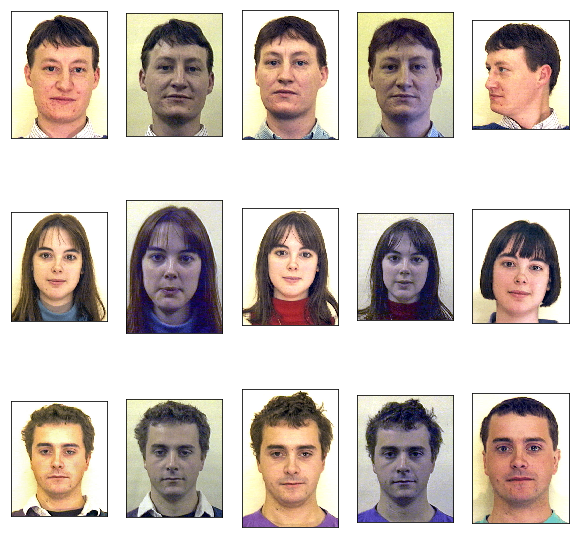

In [64]:
imgs = []
names = []
imgs.append(cv2.imread("aberden/dhands/dhands1.jpg"))
imgs.append(cv2.imread("aberden/dhands/dhands8.jpg"))
imgs.append(cv2.imread("aberden/dhands/dhands12.jpg"))
imgs.append(cv2.imread("aberden/dhands/dhands14.jpg"))
imgs.append(cv2.imread("aberden/dhands/dhands67.jpg"))

imgs.append(cv2.imread("aberden/kirsty/kirsty1.jpg"))
imgs.append(cv2.imread("aberden/kirsty/kirsty8.jpg"))
imgs.append(cv2.imread("aberden/kirsty/kirsty11.jpg"))
imgs.append(cv2.imread("aberden/kirsty/kirsty13.jpg"))
imgs.append(cv2.imread("aberden/kirsty/kirsty17.jpg"))

imgs.append(cv2.imread("aberden/amellanby/amellanby1.jpg"))
imgs.append(cv2.imread("aberden/amellanby/amellanby8.jpg"))
imgs.append(cv2.imread("aberden/amellanby/amellanby11.jpg"))
imgs.append(cv2.imread("aberden/amellanby/amellanby14.jpg"))
imgs.append(cv2.imread("aberden/amellanby/amellanby18.jpg"))

plt.figure(figsize=(10,10))
for i in range(len(imgs)):
#         x = randint(0, len(xData))
    plt.subplot(3,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imgs[i][:,:,::-1])#, cmap=plt.cm.binary)
#     plt.xlabel(cls[i].name[:-1])
# plt.tight_layout(pad=0.01, w_pad=0.5, h_pad=0.01)
plt.subplots_adjust(hspace=0.2)
plt.show()

In [69]:
def drawPred(cls, n=len(cls)):
    plt.figure(figsize=(10,10))
    for i in range(n):
#         x = randint(0, len(xData))
        plt.subplot(4,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(cls[i].image.img, cmap=plt.cm.binary)
        plt.xlabel(cls[i].name)
    plt.show()


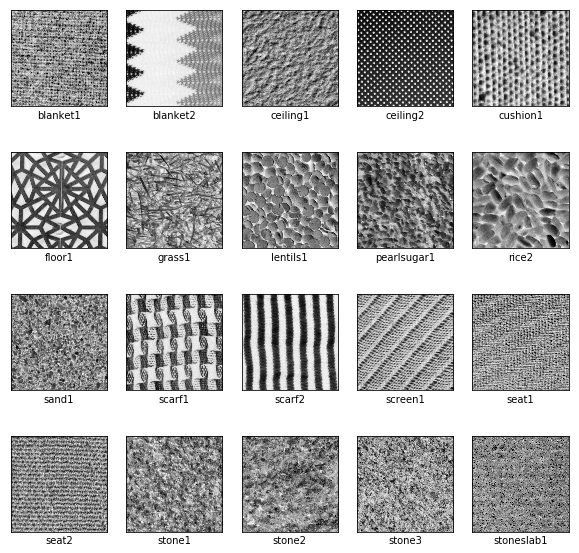

In [70]:
drawPred(cls)

In [203]:
dists = []
for i in range(1, len(files)):
    tex = cv2.imread(path+files[i], 0)
    texture = ssa2d.SSA2D(tex, 7, 7)
    texture.trajectMatrix()
    texture.SVD()
    dists.append(ssa2d.getDistance(image,texture,5))

In [204]:
sum(dists)/len(dists)

7.88021948297047e-05

In [57]:
from os import walk
path = "./ktd/sand1/"

for (dirpath, dirnames, filenames) in walk(path):
    files = filenames
    break
dists2 = []
for i in range(len(files)):
    tex = cv2.imread(path+files[i], 0)
    texture = ssa2d.SSA2D(tex, 20, 20)
    texture.trajectMatrix()
    texture.SVD()
    dists2.append(ssa2d.getDistance(image,texture))

In [58]:
sum(dists2)/len(dists2)

0.0026860114826621068

In [335]:
texture = ssa2d.SSA2D(tex, 7, 7)
texture.trajectMatrix()
texture.SVD()

In [337]:
image.U = texture.U
image.V = texture.V

In [9]:
cls[0].image.reconstruct()

In [10]:
im = Image.fromarray(cls[0].image.recImg)
im.show()

In [347]:
maxIntensity = 255.0 # depends on dtype of image data
x = arange(maxIntensity) 

# Parameters for manipulating image data
phi = 1
theta = 1
y = (maxIntensity/phi)*(x/(maxIntensity/theta))**0.5

# Decrease intensity such that
# dark pixels become much darker, 
# bright pixels become slightly dark 
newImage1 = (maxIntensity/phi)*(image.recImg/(maxIntensity/theta))**2
newImage1 = array(newImage1,dtype=uint8)

im = Image.fromarray(newImage1)
im.show()

In [90]:
t = ssa2d.findTexture(image, image, 1)

(1600, 145161)


In [91]:
im = Image.fromarray(t)
im.show()

In [114]:
ssa2d.getDistance(image,texture)

0.00020345965503206723

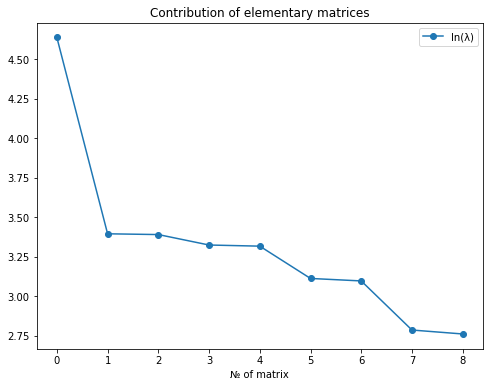

In [336]:
ln = np.array([np.log(texture.s[i]) / np.log(100) for i in range(9)])
plt.xlabel("№ of matrix")
plt.title("Contribution of elementary matrices")
plt.plot(np.arange(len(ln)), ln, marker='o',label='ln(λ)')
plt.legend()
plt.show()

In [87]:
ln = np.array([(image.s[i]) / sum(image.s) for i in range(15)])

IndexError: index 9 is out of bounds for axis 0 with size 9

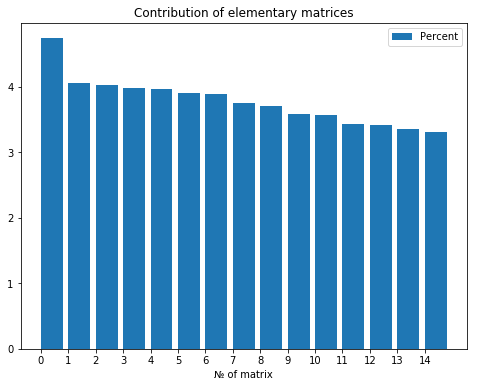

In [88]:
plt.bar(np.arange(len(ln)), ln, align='edge',label='Percent')
plt.xticks(np.arange(len(ln)), np.arange(len(ln)))
plt.title("Contribution of elementary matrices")
plt.legend()
plt.xlabel("№ of matrix")
plt.show()